In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [2]:
app_data = pd.read_csv(r"./EDA_CaseStudy/application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Write code for inspection here
for i in app_data.columns:
    print(i,app_data[i].dtypes)
print("\nshape",app_data.shape)
#print("datatypes",app_data.dtypes)
print("\ndescription",app_data.describe())
print("\ninfo",app_data.info())

SK_ID_CURR int64
TARGET int64
NAME_CONTRACT_TYPE object
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
CNT_CHILDREN int64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE object
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH int64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL int64
FLAG_EMP_PHONE int64
FLAG_WORK_PHONE int64
FLAG_CONT_MOBILE int64
FLAG_PHONE int64
FLAG_EMAIL int64
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64
REGION_RATING_CLIENT_W_CITY int64
WEEKDAY_APPR_PROCESS_START object
HOUR_APPR_PROCESS_START int64
REG_REGION_NOT_LIVE_REGION int64
REG_REGION_NOT_WORK_REGION int64
LIVE_REGION_NOT_WORK_REGION int64
REG_CITY_NOT_LIVE_CITY int64
REG_CITY_NOT_WORK_CITY int64
LIVE_CITY_NOT_WORK_CITY int64
ORGANIZATION_TYPE object
EXT_SOUR

In [4]:
#we will remove columns either if they have large number of missing values (greater than 15%) , or are not required
#in the analysis

perc = (app_data.isnull().sum(axis=0)/len(app_data.index))*100
list_to_include = []
for i in perc.index :
    if(perc[i] < 15.0):
        list_to_include.append(i)
    print(i,perc[i])
print("\n",len(list_to_include))

SK_ID_CURR 0.0
TARGET 0.0
NAME_CONTRACT_TYPE 0.0
CODE_GENDER 0.0
FLAG_OWN_CAR 0.0
FLAG_OWN_REALTY 0.0
CNT_CHILDREN 0.0
AMT_INCOME_TOTAL 0.0
AMT_CREDIT 0.0
AMT_ANNUITY 0.003902299429939092
AMT_GOODS_PRICE 0.09040327012692229
NAME_TYPE_SUITE 0.42014757195677555
NAME_INCOME_TYPE 0.0
NAME_EDUCATION_TYPE 0.0
NAME_FAMILY_STATUS 0.0
NAME_HOUSING_TYPE 0.0
REGION_POPULATION_RELATIVE 0.0
DAYS_BIRTH 0.0
DAYS_EMPLOYED 0.0
DAYS_REGISTRATION 0.0
DAYS_ID_PUBLISH 0.0
OWN_CAR_AGE 65.9908100848425
FLAG_MOBIL 0.0
FLAG_EMP_PHONE 0.0
FLAG_WORK_PHONE 0.0
FLAG_CONT_MOBILE 0.0
FLAG_PHONE 0.0
FLAG_EMAIL 0.0
OCCUPATION_TYPE 31.345545362604916
CNT_FAM_MEMBERS 0.0006503832383231819
REGION_RATING_CLIENT 0.0
REGION_RATING_CLIENT_W_CITY 0.0
WEEKDAY_APPR_PROCESS_START 0.0
HOUR_APPR_PROCESS_START 0.0
REG_REGION_NOT_LIVE_REGION 0.0
REG_REGION_NOT_WORK_REGION 0.0
LIVE_REGION_NOT_WORK_REGION 0.0
REG_CITY_NOT_LIVE_CITY 0.0
REG_CITY_NOT_WORK_CITY 0.0
LIVE_CITY_NOT_WORK_CITY 0.0
ORGANIZATION_TYPE 0.0
EXT_SOURCE_1 56.3810725

In [5]:
#removing above columns
clean_df = app_data[list_to_include]
clean_df.shape
print(clean_df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

In [6]:
# merging some columns, will decide how to do

#rating of client's region
#checking mismatches in both
k = (clean_df['REGION_RATING_CLIENT'] != clean_df['REGION_RATING_CLIENT_W_CITY']).sum(axis=0)
print(k/len(clean_df.index)*100)

#as we can see mismatch is negligible,we can neglect REGION_RATING_CLIENT_W_CITY
clean_df.drop(['REGION_RATING_CLIENT_W_CITY'], axis=1,inplace=True)

1.8594456783659772


C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
#queries by credit beaureu, we can merge for whole year for fnding how many times, person asked for a loan
clean_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = clean_df['AMT_REQ_CREDIT_BUREAU_YEAR'] + clean_df['AMT_REQ_CREDIT_BUREAU_HOUR'] + clean_df['AMT_REQ_CREDIT_BUREAU_DAY']+clean_df['AMT_REQ_CREDIT_BUREAU_WEEK']+clean_df['AMT_REQ_CREDIT_BUREAU_MON']+clean_df['AMT_REQ_CREDIT_BUREAU_QRT']
clean_df.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT'],axis=1,inplace=True)

C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
#how many people defaulted in person's relation in last 60 days
#OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
clean_df['OBS_CNT_SOCIAL_CIRCLE'] = clean_df['OBS_30_CNT_SOCIAL_CIRCLE'] + clean_df['OBS_60_CNT_SOCIAL_CIRCLE']
clean_df['DEF_CNT_SOCIAL_CIRCLE'] = clean_df['DEF_30_CNT_SOCIAL_CIRCLE'] + clean_df['DEF_60_CNT_SOCIAL_CIRCLE']

C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
#removing below columns
#REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
#whether customer provided contact details
#FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL
clean_df.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
              'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis=1,inplace=True)

In [10]:
#Check the perc of NaN and data types of remaining columns
perc = pd.DataFrame({"perc_empty":(clean_df.isnull().sum(axis=0)/len(clean_df.index))*100,"dtypes" : clean_df.dtypes})
print(perc)

                            perc_empty   dtypes
SK_ID_CURR                    0.000000    int64
TARGET                        0.000000    int64
NAME_CONTRACT_TYPE            0.000000   object
CODE_GENDER                   0.000000   object
FLAG_OWN_CAR                  0.000000   object
FLAG_OWN_REALTY               0.000000   object
CNT_CHILDREN                  0.000000    int64
AMT_INCOME_TOTAL              0.000000  float64
AMT_CREDIT                    0.000000  float64
AMT_ANNUITY                   0.003902  float64
AMT_GOODS_PRICE               0.090403  float64
NAME_TYPE_SUITE               0.420148   object
NAME_INCOME_TYPE              0.000000   object
NAME_EDUCATION_TYPE           0.000000   object
NAME_FAMILY_STATUS            0.000000   object
NAME_HOUSING_TYPE             0.000000   object
REGION_POPULATION_RELATIVE    0.000000  float64
DAYS_BIRTH                    0.000000    int64
DAYS_EMPLOYED                 0.000000    int64
DAYS_REGISTRATION             0.000000  

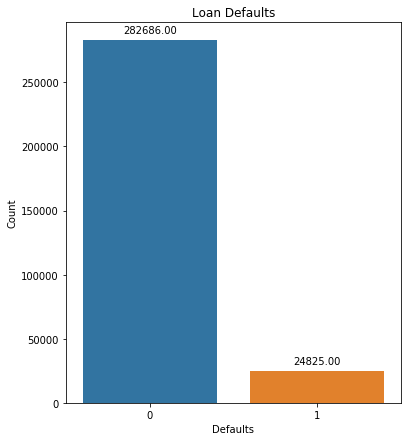

In [11]:
#print(clean_df['AMT_GOODS_PRICE'].corr(clean_df['AMT_CREDIT']))
#check data imbalance
dd = clean_df['TARGET'].value_counts()
#plotting bar graph
plt.figure(figsize = (6,7))
plt.title('Loan Defaults')
tmp = pd.DataFrame({'Defaults':dd.index,'Count':dd.values})
pt=sns.barplot(x='Defaults',y='Count',data=tmp)
#show the numbers above bars
for p in pt.patches:
    pt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [12]:
# We can see a huge imbalance in data, we should perform analysis for both of the TARGET values separately also
 
#Creating a function to plot graphs for categorical values, df-> dataframe, attr->attribute, draw against defaulter %wise
def cat_plot(df,attr,default=True,size=(7,7),invert=False):
    plt.figure(figsize = size)
    dd = df[attr].value_counts()
    tmp = pd.DataFrame({attr:dd.index,'Count':dd.values})
    if(invert==False):
        pt=sns.barplot(x=attr,y='Count',data=tmp)
    else:
        pt=sns.barplot(x='Count',y=attr,data=tmp)
    #show the numbers above bars
    for p in pt.patches:
        if(invert==False):
            pt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        else:
            pt.annotate(format(p.get_width(), '.2f'), (p.get_width()+700, p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.show()
    
    #Perc wise defaulters across this attribute
    if(default==True):
        t=df[(df['TARGET'] == 1)]
        plt.figure(figsize = size)
        ddd = t[attr].value_counts()
        ddd=(ddd/dd)*100.0
        tmp1 = pd.DataFrame({attr:ddd.index,'Perc_Def':ddd.values})
        if(invert==False):
            pt=sns.barplot(x=attr,y='Perc_Def',data=tmp1)
        else:
            pt=sns.barplot(x='Perc_Def',y=attr,data=tmp1)

        #show the numbers above bars
        for p in pt.patches:
            if(invert==False):
                pt.annotate(format(p.get_height(), '.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            else:
                pt.annotate(format(p.get_width(), '.2f')+'%', (p.get_width()+700, p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')
        plt.xticks(rotation=90)
        plt.show()
        
        #non-defaulters
        t=df[(df['TARGET'] == 0)]
        plt.figure(figsize = size)
        ddd = t[attr].value_counts()
        ddd=(ddd/dd)*100.0
        tmp1 = pd.DataFrame({attr:ddd.index,'Perc_Repaid':ddd.values})
        if(invert==False):
            pt=sns.barplot(x=attr,y='Perc_Repaid',data=tmp1)
        else:
            pt=sns.barplot(x='Perc_Repaid',y=attr,data=tmp1)

        #show the numbers above bars
        for p in pt.patches:
            if(invert==False):
                pt.annotate(format(p.get_height(), '.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
            else:
                pt.annotate(format(p.get_width(), '.2f')+'%', (p.get_width()+700, p.get_y() + p.get_height() / 2.), ha = 'center', va = 'center', xytext = (10, 0), textcoords = 'offset points')
        plt.xticks(rotation=90)
        plt.show()


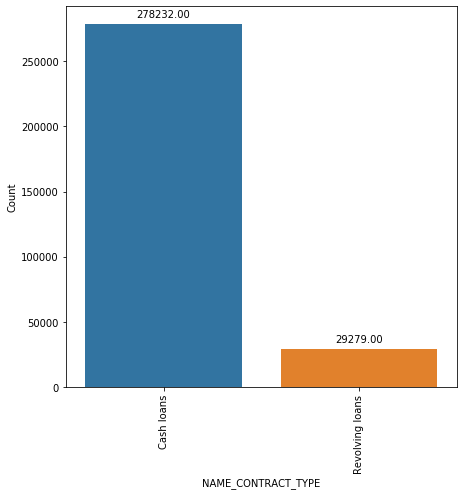

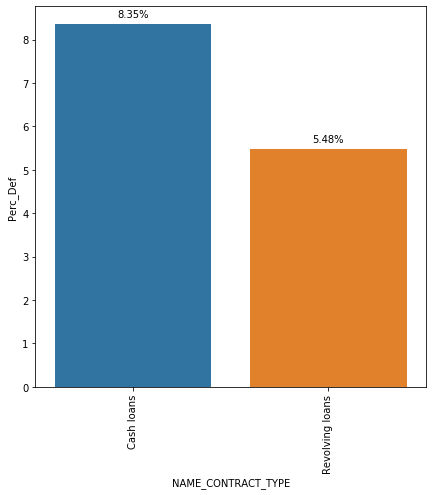

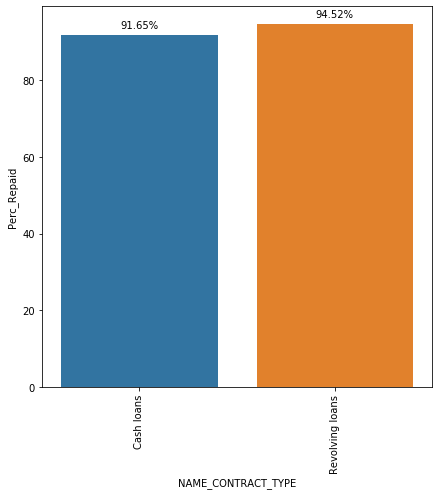

In [13]:
#Analysing for contract type
cat_plot(clean_df,'NAME_CONTRACT_TYPE',True)

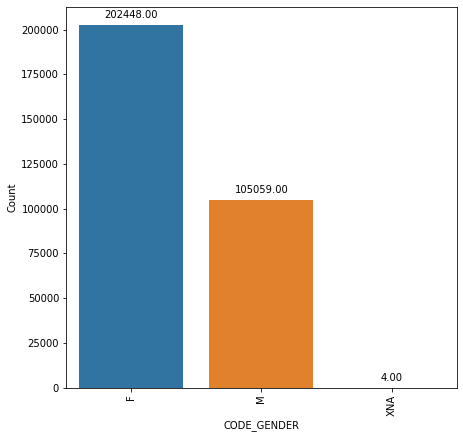

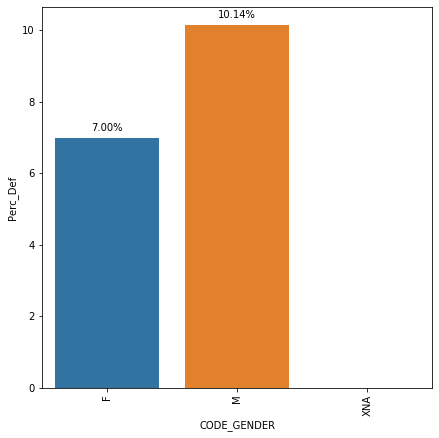

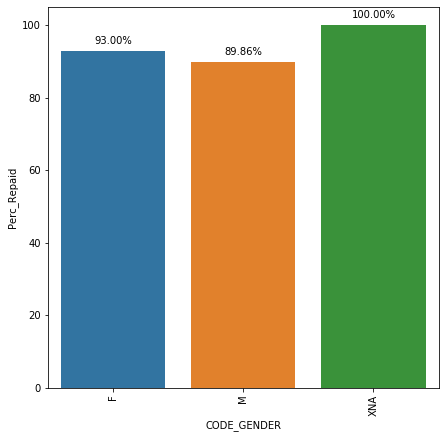

In [14]:
#We can see here that cash loans have higher defaulter rates by about 3% higher than revolving loans
#also most of the loans are cash loans only

#Analysing for gender wise defaulters
cat_plot(clean_df,'CODE_GENDER',True)

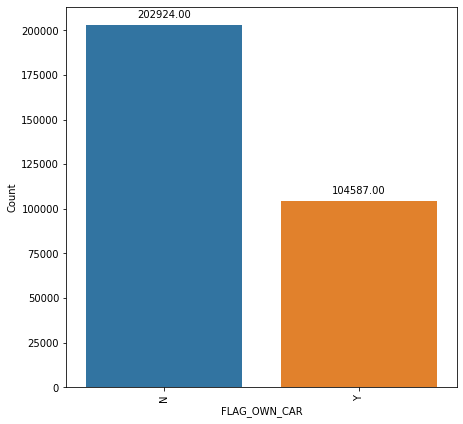

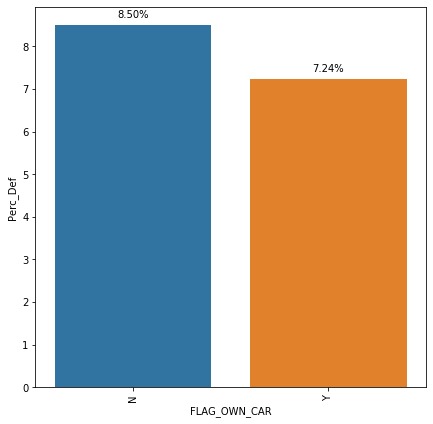

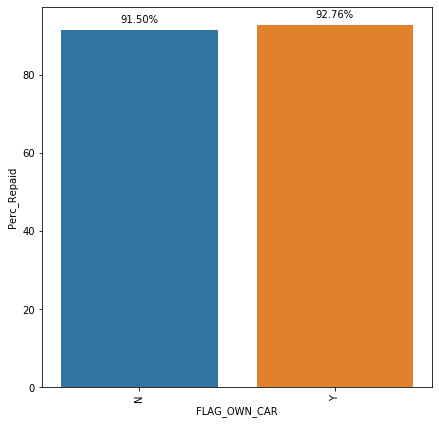

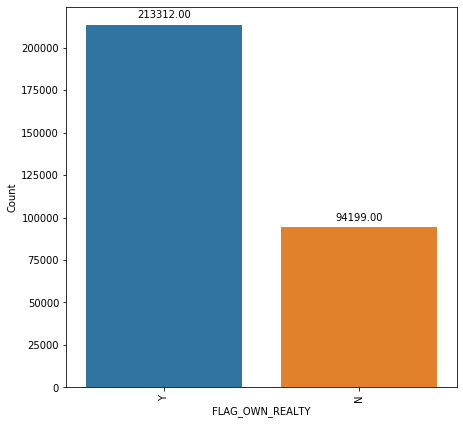

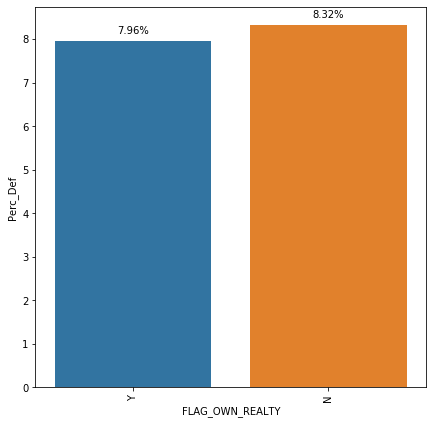

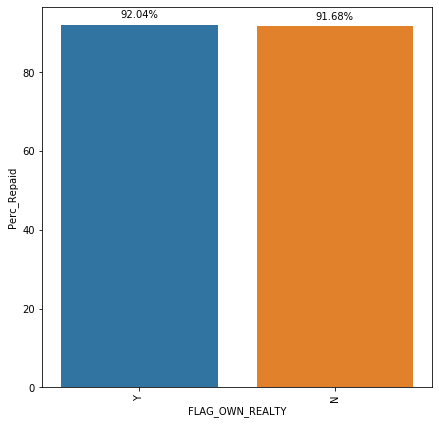

In [15]:
#This is an important trend here, we see that loans are taken mostly by females(about double the number of males),
#but defaulters are more in male category significantly 3% higher

#checking for customers having own car and property
cat_plot(clean_df,'FLAG_OWN_CAR',True)
cat_plot(clean_df,'FLAG_OWN_REALTY',True)

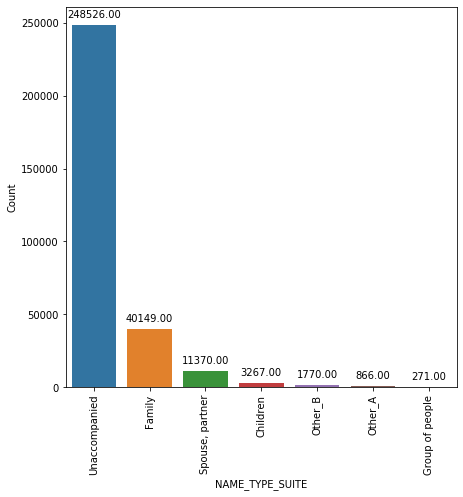

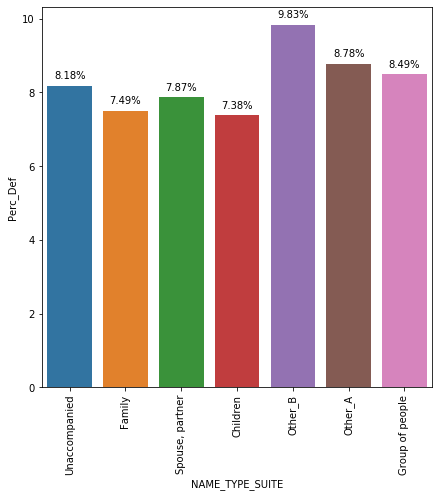

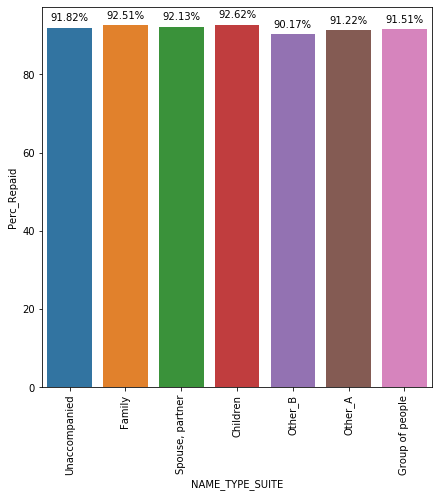

In [16]:
#Defaulters are less in both categories who have car/realty, but only by a small margin

#analysing for type of suite
cat_plot(clean_df,'NAME_TYPE_SUITE',True)

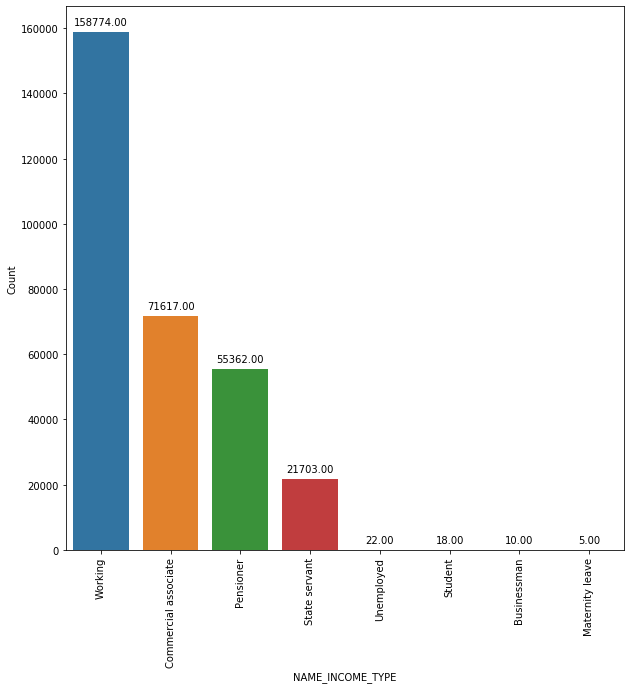

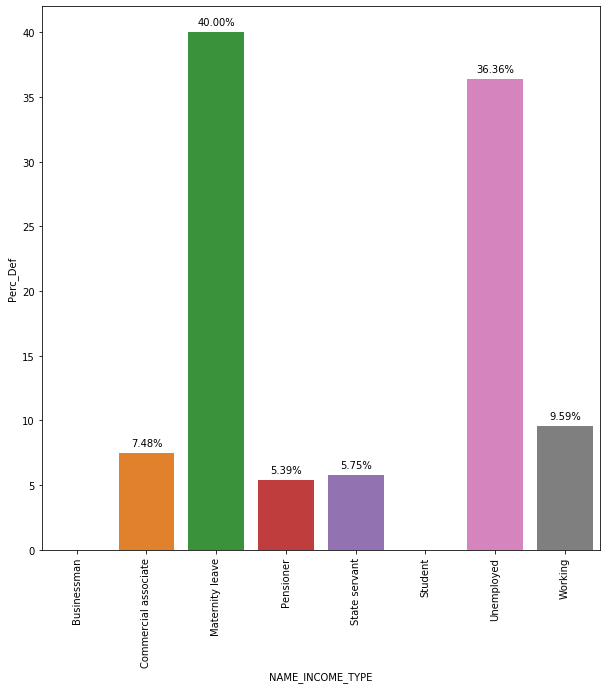

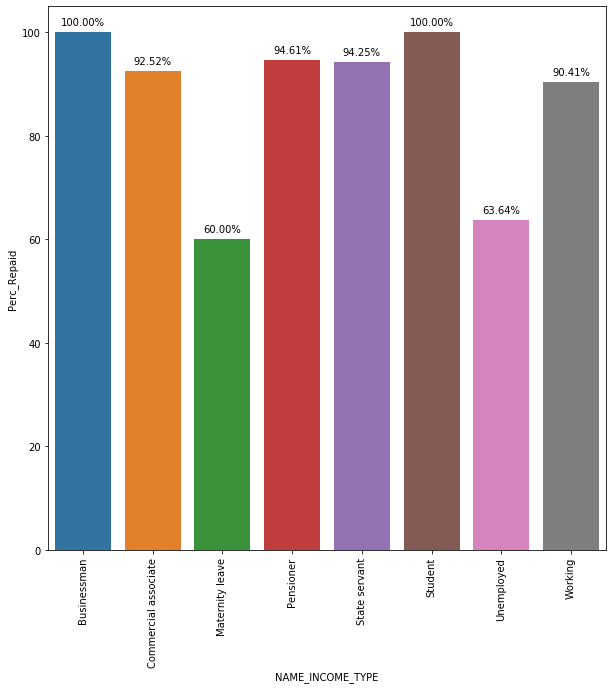

In [17]:
#Most of the people came unaccompanied
#Defaulters are less who came with children/family/spouse,partner

#NAME_INCOME_TYPE analysis
cat_plot(clean_df,'NAME_INCOME_TYPE',True,(10,10))

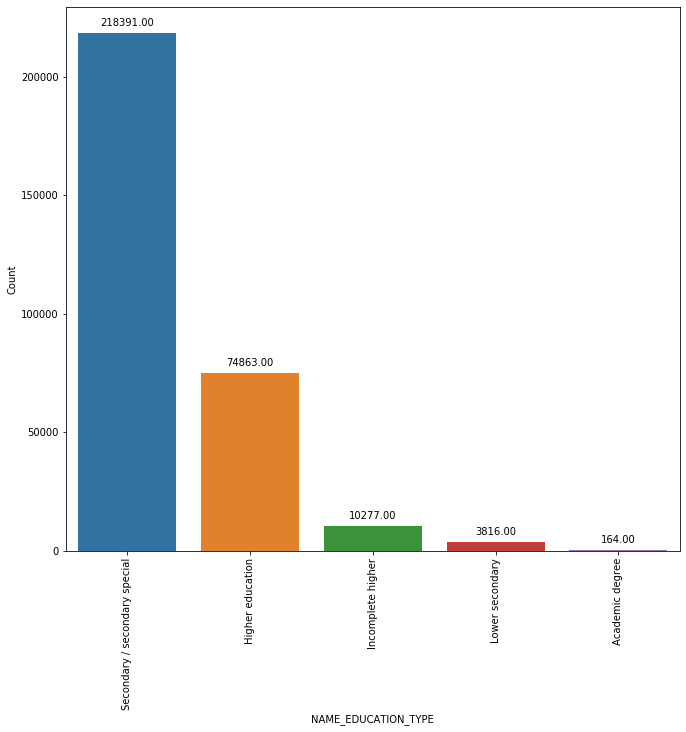

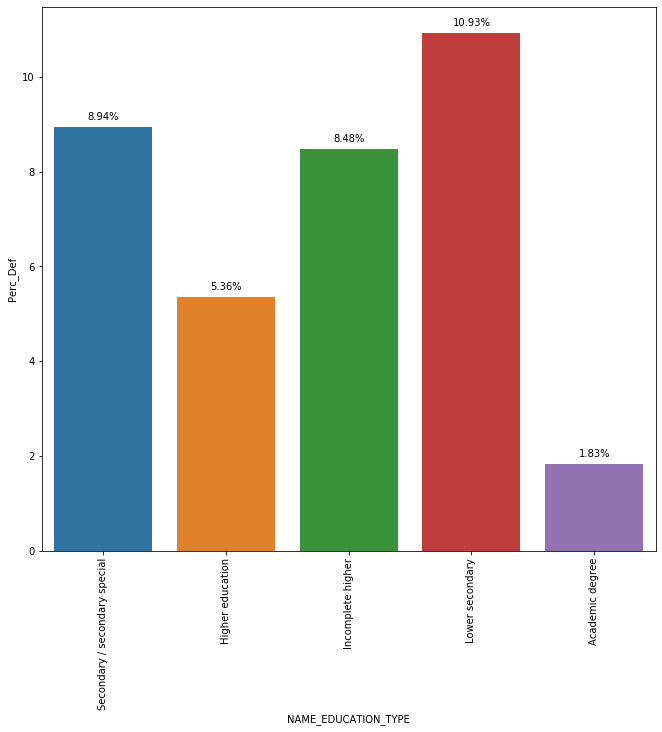

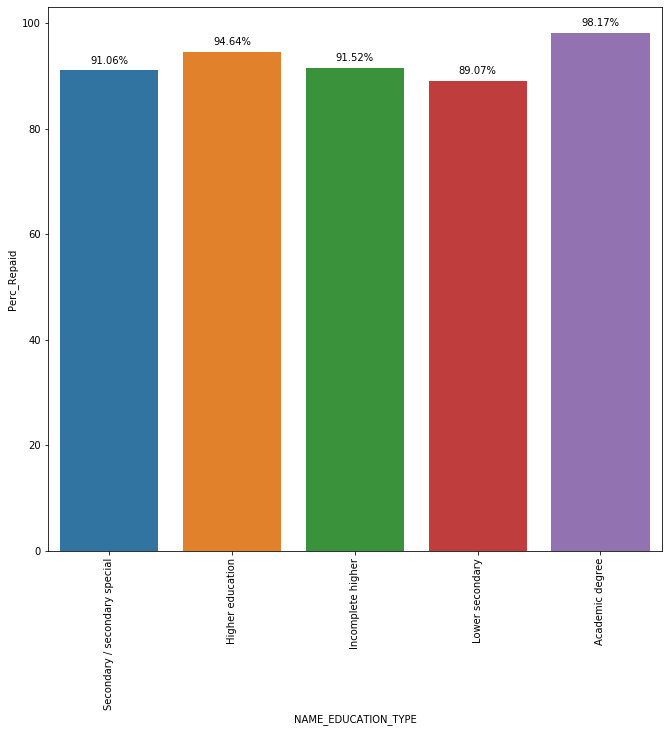

In [18]:
#The unemployed showed more signs of defaulters(Maternity leave people are very less, so we can ignore that)

#NAME_EDUCATION_TYPE analysis
cat_plot(clean_df,'NAME_EDUCATION_TYPE',True,(11,10))

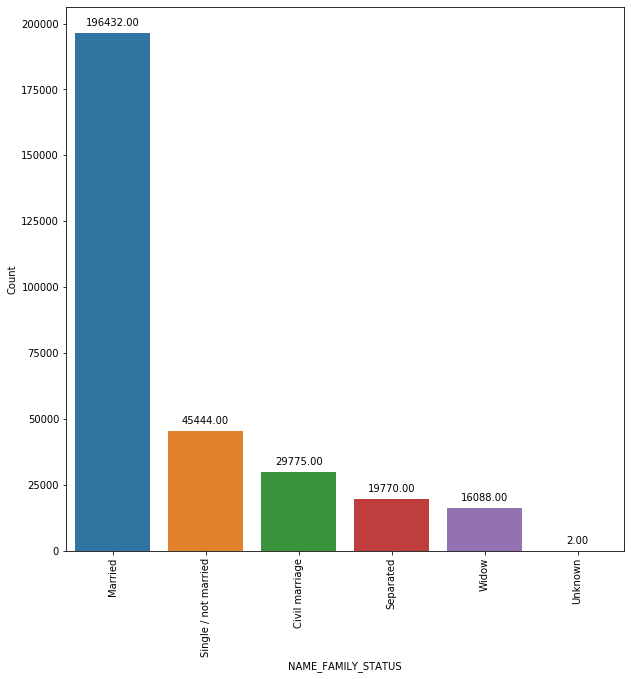

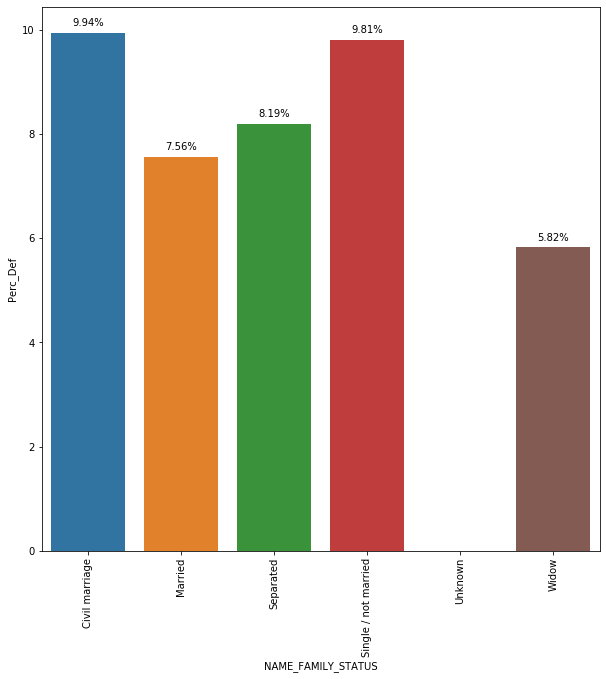

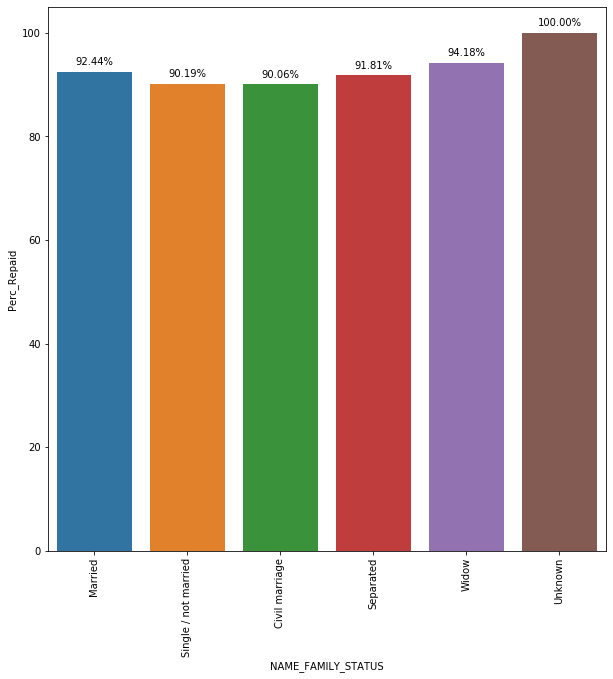

In [19]:
#Analysis

#NAME_FAMILY_STATUS
cat_plot(clean_df,'NAME_FAMILY_STATUS',True,(10,10))

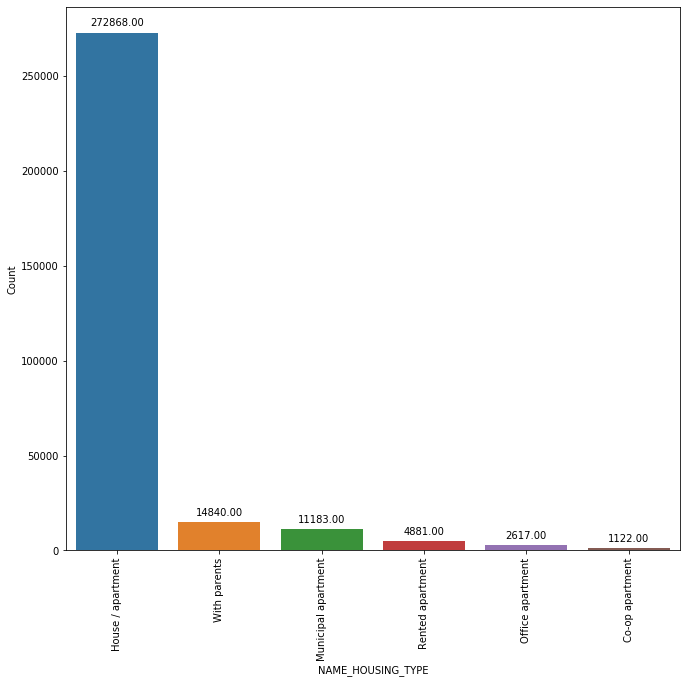

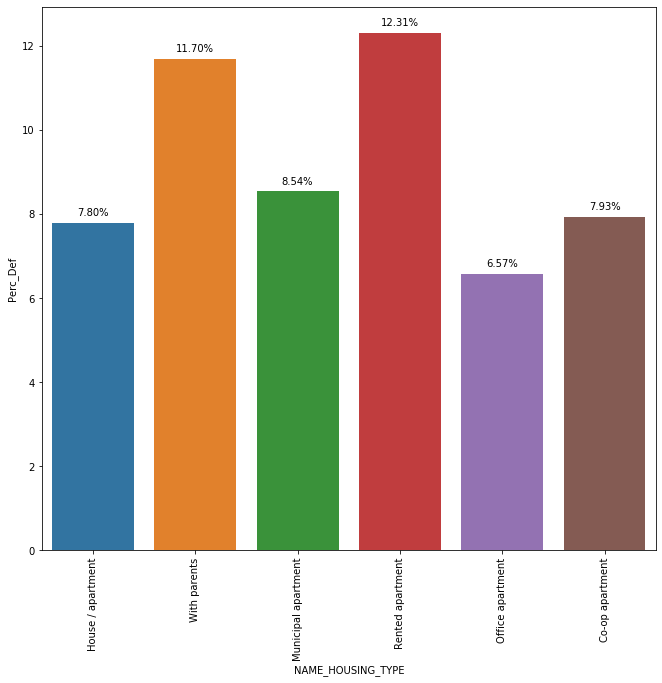

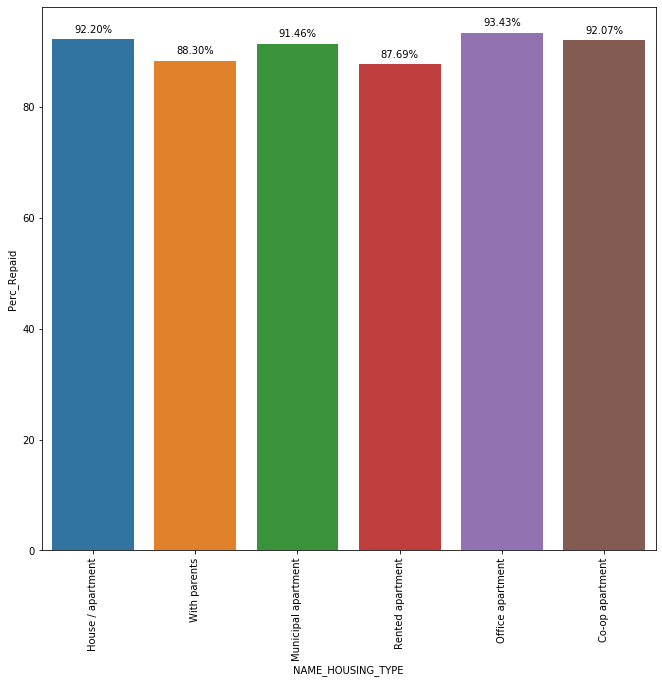

In [20]:
#Analysis

#NAME_HOUSING_TYPE
cat_plot(clean_df,'NAME_HOUSING_TYPE',True,(11,10))

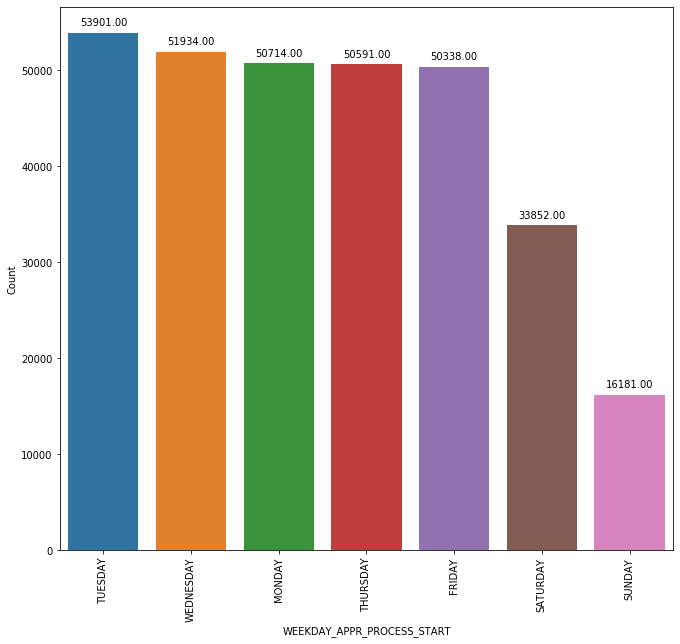

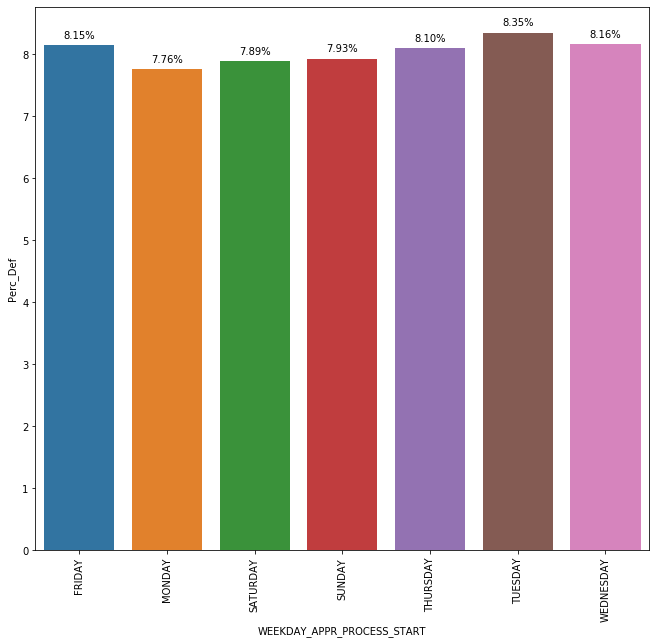

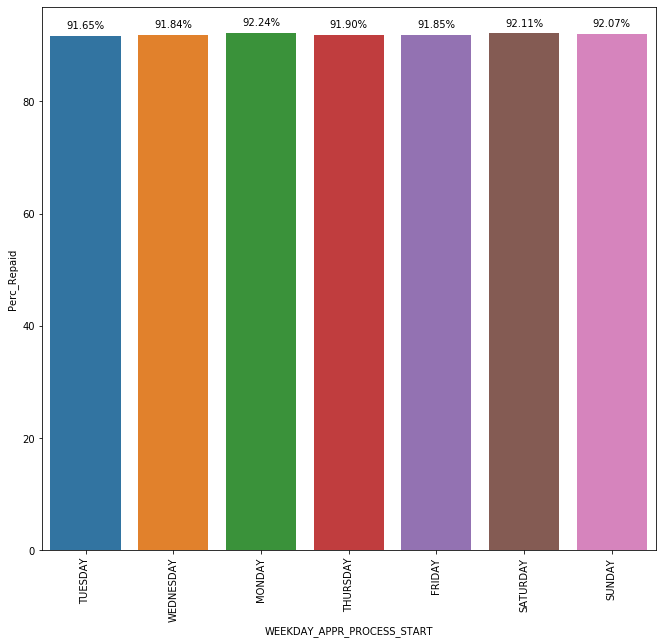

In [21]:
#Analysis

#WEEKDAY_APPR_PROCESS_START
cat_plot(clean_df,'WEEKDAY_APPR_PROCESS_START',True,(11,10))

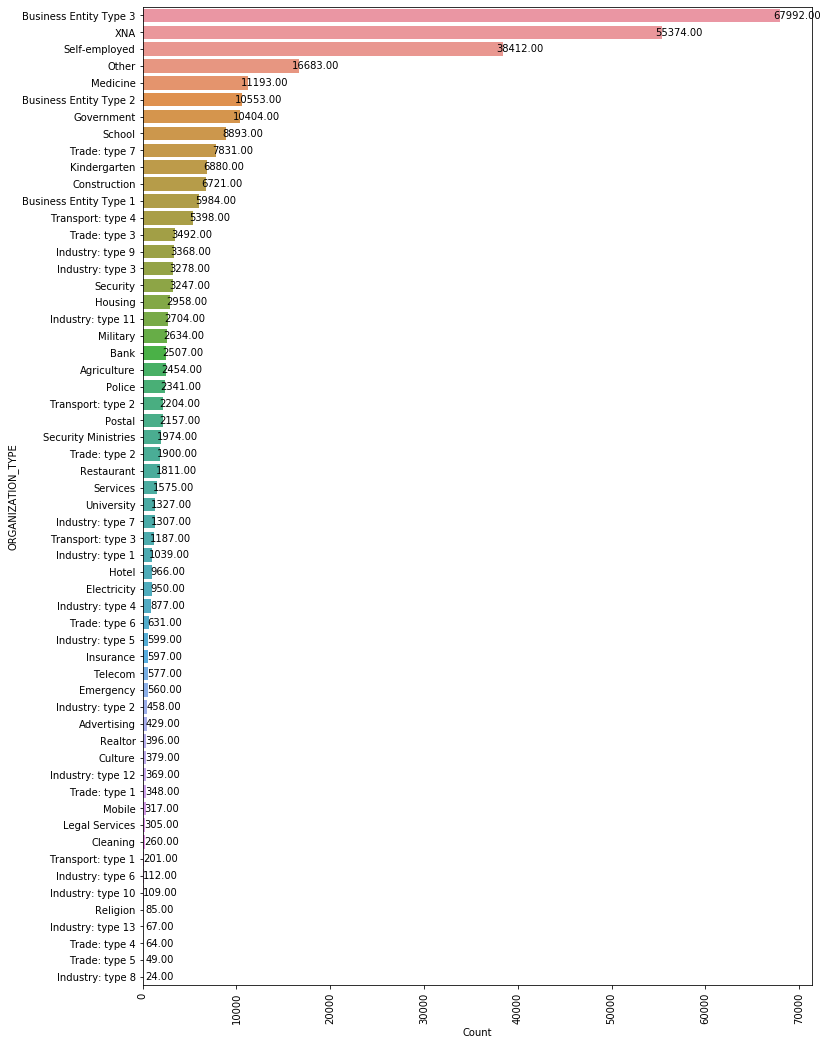

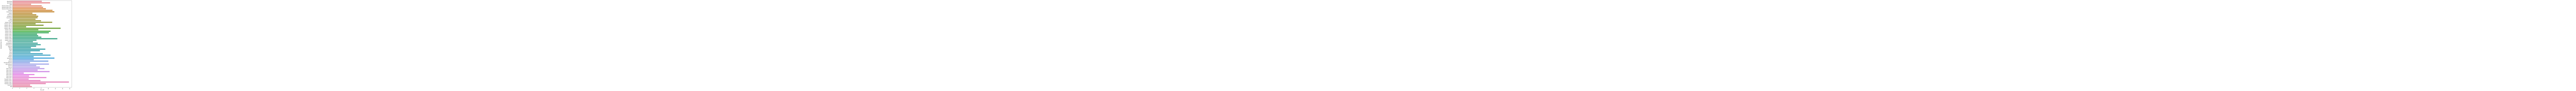

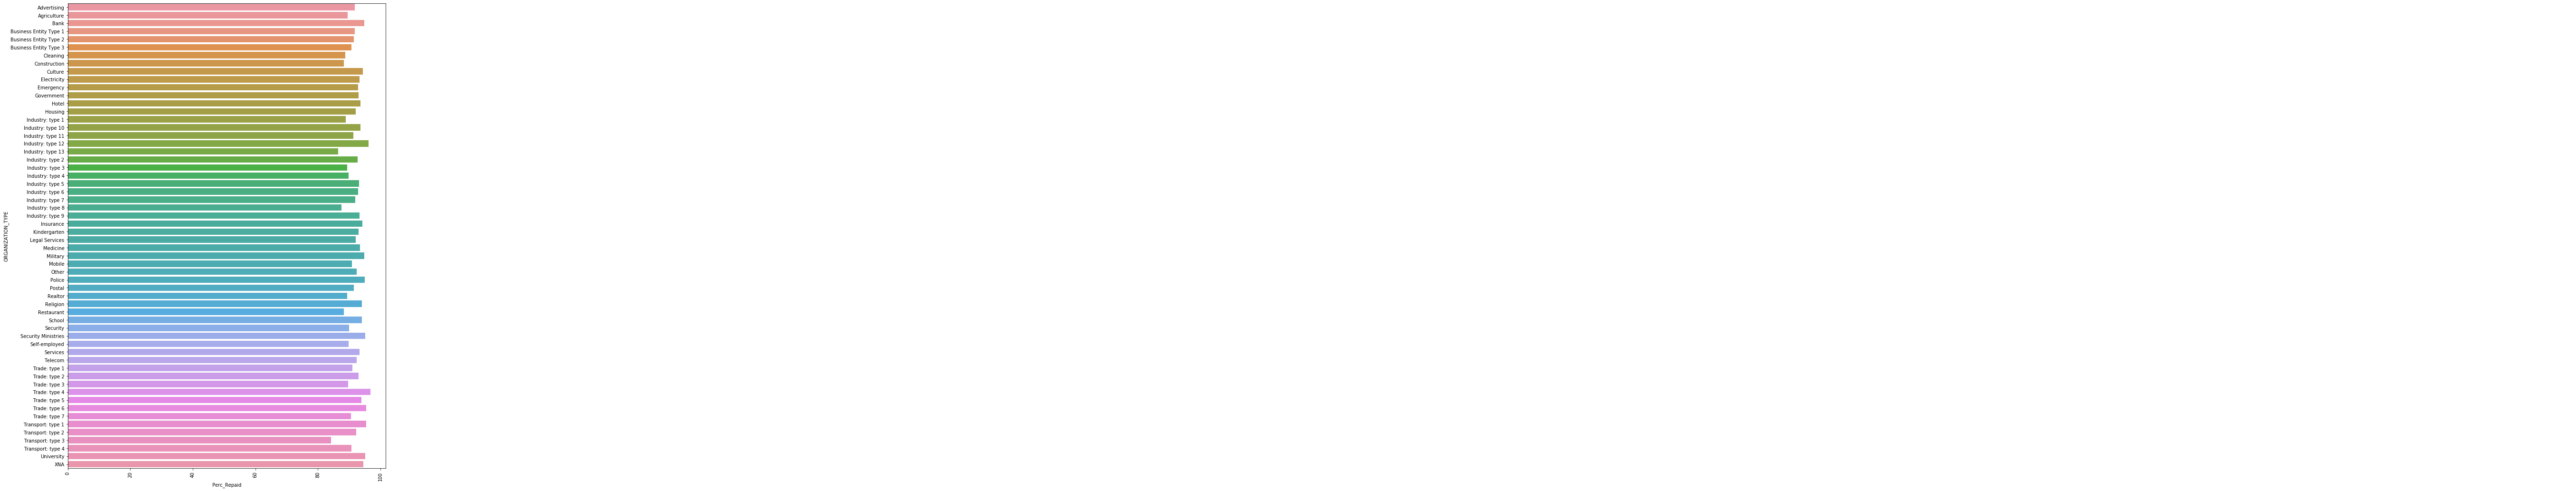

In [22]:
#Analysis

#ORGANIZATION_TYPE
cat_plot(clean_df,'ORGANIZATION_TYPE',True,(12,18),True)

In [23]:
#TBD Analysis for organisation

19 0


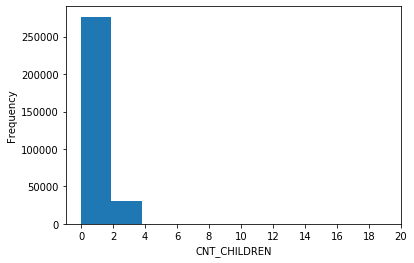

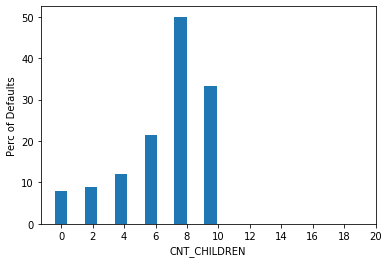

In [24]:
#checking the min and max in CNT_CHILDREN
print(clean_df['CNT_CHILDREN'].max(),clean_df['CNT_CHILDREN'].min())
#binning CNT_CHILDREN in to 2 intervals
pp=plt.hist(clean_df['CNT_CHILDREN'], bins=10)
plt.ylabel('Frequency')
plt.xlabel('CNT_CHILDREN')
plt.xticks(np.arange(0, 21, 2))
plt.show()
#We can clearly see here that most of the people are taking more loans

#checking the defaulters for number of children
defaulter = clean_df[clean_df['TARGET']==1]
def_hist =  plt.hist(defaulter['CNT_CHILDREN'], bins=10,range=(0,19))
kk=[]
for i in range(len(def_hist[0])):
    if(pp[0][i]!=0):
        kk.append((def_hist[0][i]/pp[0][i]) *100)
    else:
        kk.append(0.0)
plt.close()
plt.bar(tuple(def_hist[1][:-1]),tuple(kk))
plt.ylabel('Perc of Defaults')
plt.xlabel('CNT_CHILDREN')
plt.xticks(np.arange(0, 21, 2))
plt.draw()

In [25]:
#We can see that mostly people having more children are more likely to default

#making function for distribution plotting of continuous variables
def cont_plot(df,attrib):
    defaulters = df.loc[df['TARGET'] == 0]
    payers = df.loc[df['TARGET'] == 1]
    sns.set_style('whitegrid')
    plt.figure(figsize = (10,10))
    sns.kdeplot(defaulters[attrib], bw=0.5,label="TARGET = 1")
    sns.kdeplot(payers[attrib], bw=0.5,label="TARGET = 0")
    plt.ylabel('Density Plot', fontsize=12)
    plt.xlabel(attrib, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();


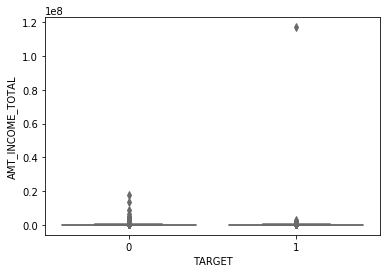

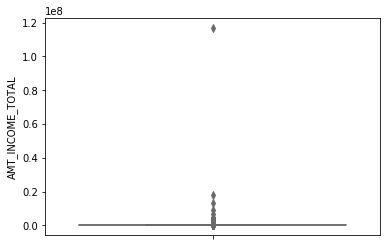

0.980    427500.0
0.995    630000.0
0.999    900000.0
Name: AMT_INCOME_TOTAL, dtype: float64
117000000.0


In [26]:
#Now checking for outliers in AMT_INCOME_TOTAL
#drawing boxplot to see spread of data

ax = sns.boxplot(y="AMT_INCOME_TOTAL", x="TARGET",data=clean_df, palette="Set3")
plt.show()
ax2 = sns.boxplot(y="AMT_INCOME_TOTAL",data=clean_df, palette="Set3")
plt.show()
#we can see data is spread so much, so finding the 95 percentile values
print(clean_df['AMT_INCOME_TOTAL'].quantile([0.98,0.995,0.999]))
print(clean_df['AMT_INCOME_TOTAL'].max())

0.4601461411136512
95.49121820032454


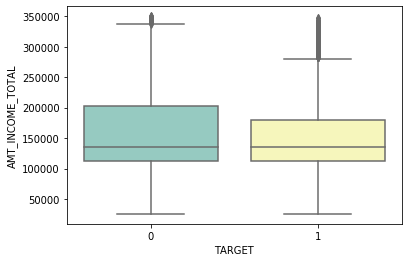

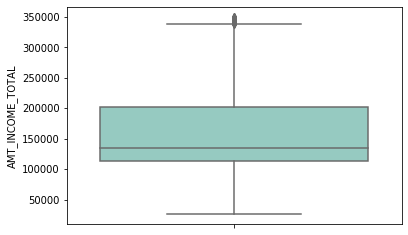

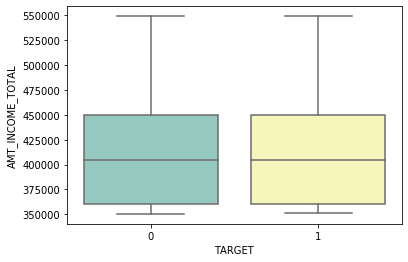

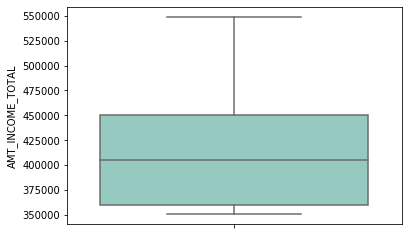

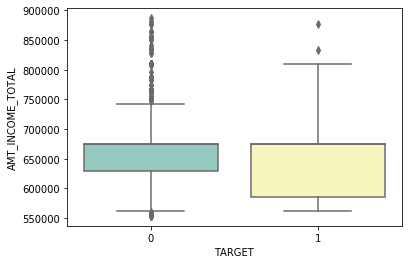

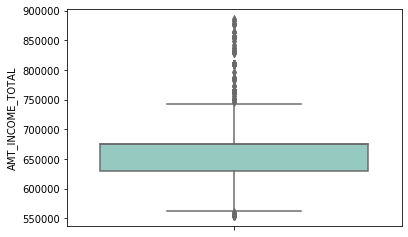

In [27]:
#as we can see that there is huge variation in the income, we must analyse according to different buckets
#Let us break data into 3 based on salaries, 1 with less than 350000, and other with > 350000 and < 550000 and third upto 900000
# rest we can neglect as they're very less in numbers

low_sal = clean_df[clean_df['AMT_INCOME_TOTAL']<350000]
med_high_sal = clean_df[(clean_df['AMT_INCOME_TOTAL']>=350000) & (clean_df['AMT_INCOME_TOTAL']<550000)]
high_sal = clean_df[(clean_df['AMT_INCOME_TOTAL']>=550000) & (clean_df['AMT_INCOME_TOTAL']<900000)]

print(len(high_sal.index)/len(clean_df.index) *100)
print(len(low_sal.index)/len(clean_df.index) *100)

#drawing boxplots
ax = sns.boxplot(y="AMT_INCOME_TOTAL", x="TARGET",data=low_sal, palette="Set3")
plt.show()
ax2 = sns.boxplot(y="AMT_INCOME_TOTAL",data=low_sal, palette="Set3")
plt.show()

ax = sns.boxplot(y="AMT_INCOME_TOTAL", x="TARGET",data=med_high_sal, palette="Set3")
plt.show()
ax2 = sns.boxplot(y="AMT_INCOME_TOTAL",data=med_high_sal, palette="Set3")
plt.show()

ax = sns.boxplot(y="AMT_INCOME_TOTAL", x="TARGET",data=high_sal, palette="Set3")
plt.show()
ax2 = sns.boxplot(y="AMT_INCOME_TOTAL",data=high_sal, palette="Set3")
plt.show()

#we can find that even above 550000 , the calues are very less ~.46%
#but let us continue then also to find insights in that category also


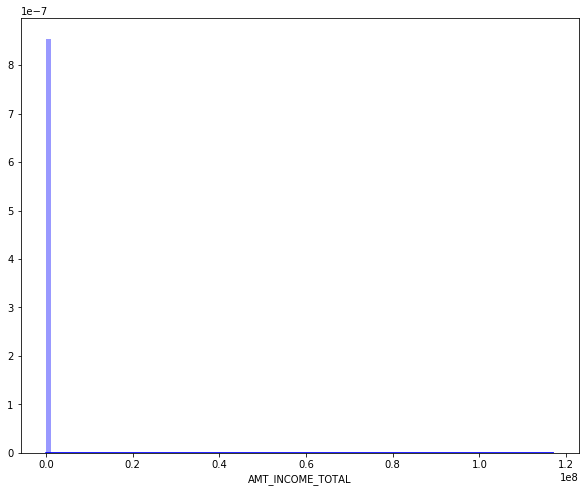

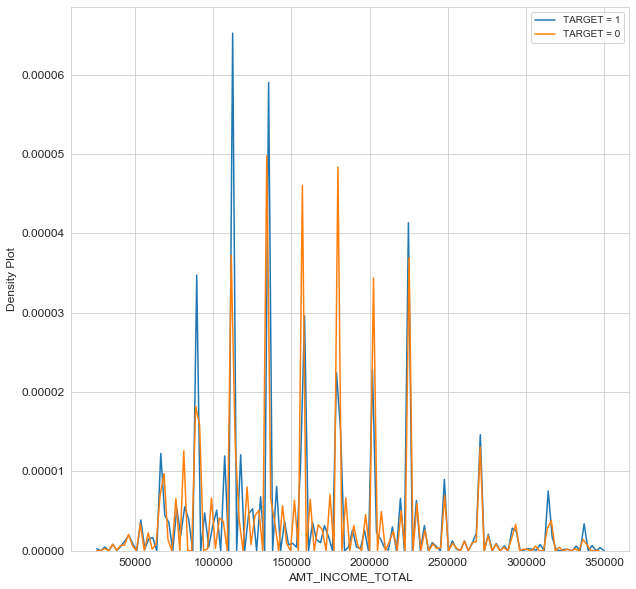

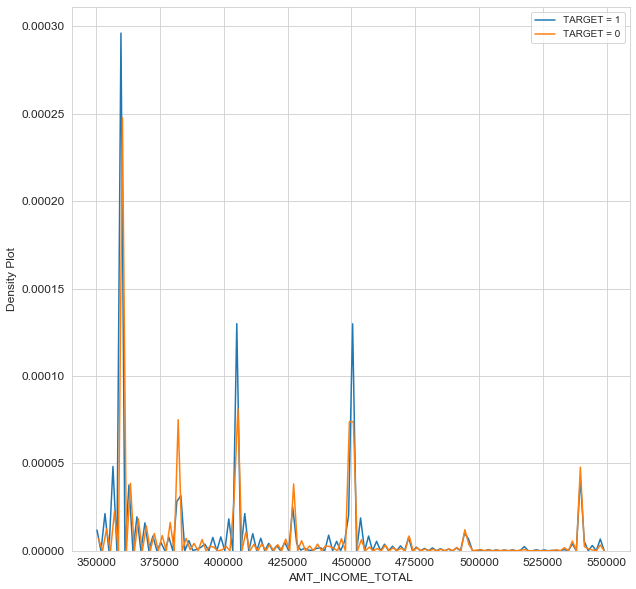

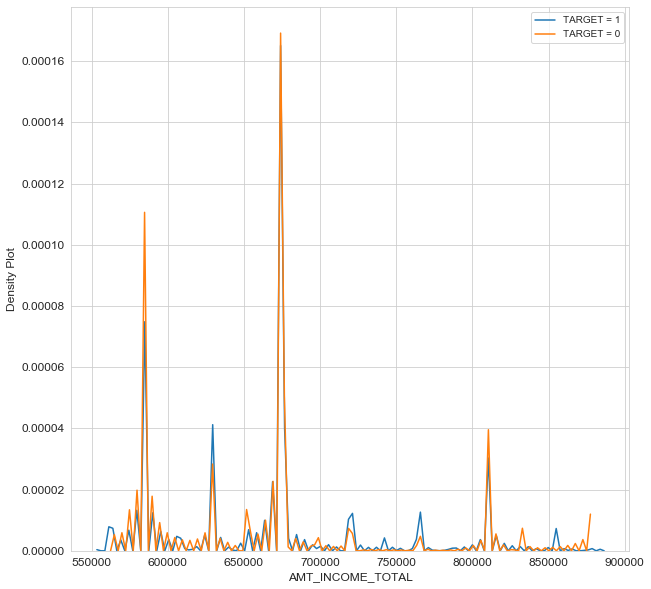

In [28]:
# let us find distributions for each category of salaries defined
plt.figure(figsize = (10,8))
sns.distplot(clean_df['AMT_INCOME_TOTAL'].dropna(),color='blue', kde=True,bins=100)
plt.show()   
cont_plot(low_sal,'AMT_INCOME_TOTAL')
cont_plot(med_high_sal,'AMT_INCOME_TOTAL')
cont_plot(high_sal,'AMT_INCOME_TOTAL')

In [29]:
#Analysis for income types

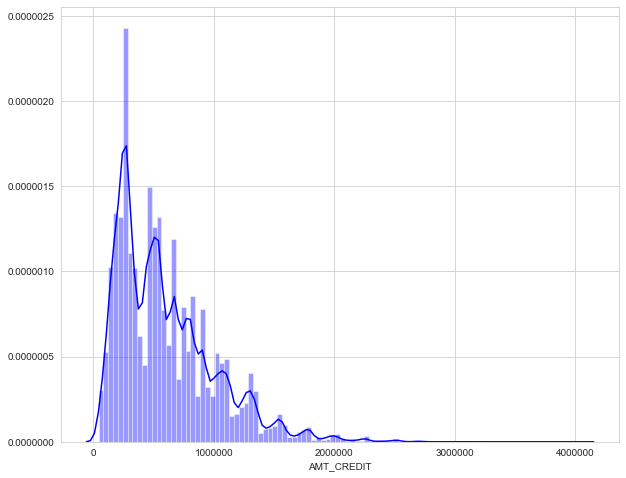

0.25    270000.0
0.50    513531.0
0.75    808650.0
Name: AMT_CREDIT, dtype: float64


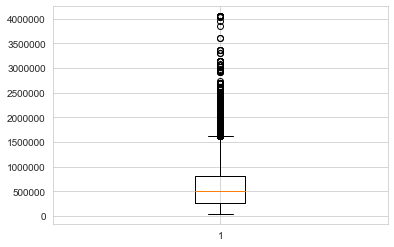

In [30]:
#AMT_CREDIT
plt.figure(figsize = (10,8))
sns.distplot(clean_df['AMT_CREDIT'].dropna(),color='blue', kde=True,bins=100)
plt.show()
print(clean_df['AMT_CREDIT'].quantile([0.25,0.5,0.75]))
boxplot = plt.boxplot(clean_df['AMT_CREDIT'])
caps=[item.get_ydata()[0] for item in boxplot['caps']]
plt.show()

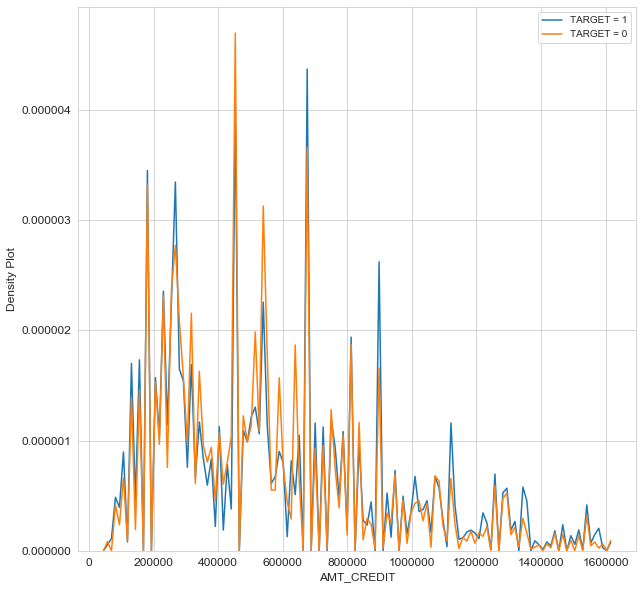

In [31]:
#removing the outliers
credit_amt=clean_df[clean_df['AMT_CREDIT'] < caps[1]]

#checking the defaulters and payers
cont_plot(credit_amt,'AMT_CREDIT')

In [32]:
#TBD analysis for loan amount

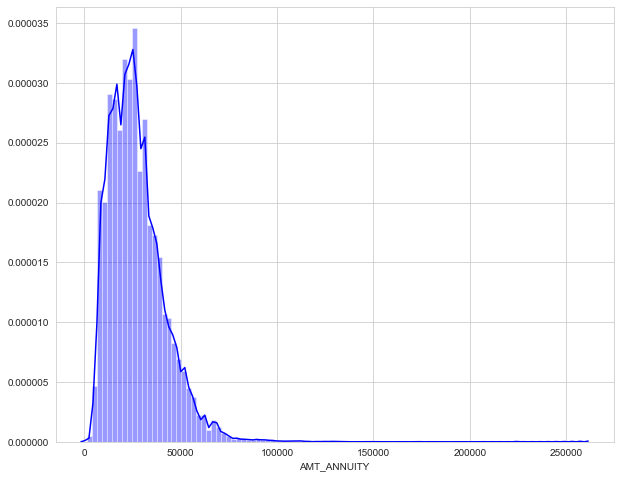

0.25    16524.0
0.50    24903.0
0.75    34596.0
Name: AMT_ANNUITY, dtype: float64


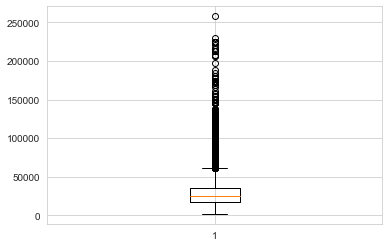

In [33]:
#AMT_ANNUITY
plt.figure(figsize = (10,8))
sns.distplot(clean_df['AMT_ANNUITY'].dropna(),color='blue', kde=True,bins=100)
plt.show()
print(clean_df['AMT_ANNUITY'].quantile([0.25,0.5,0.75]))
boxplot = plt.boxplot(clean_df['AMT_ANNUITY'].dropna())
caps=[item.get_ydata()[0] for item in boxplot['caps']]
plt.show()

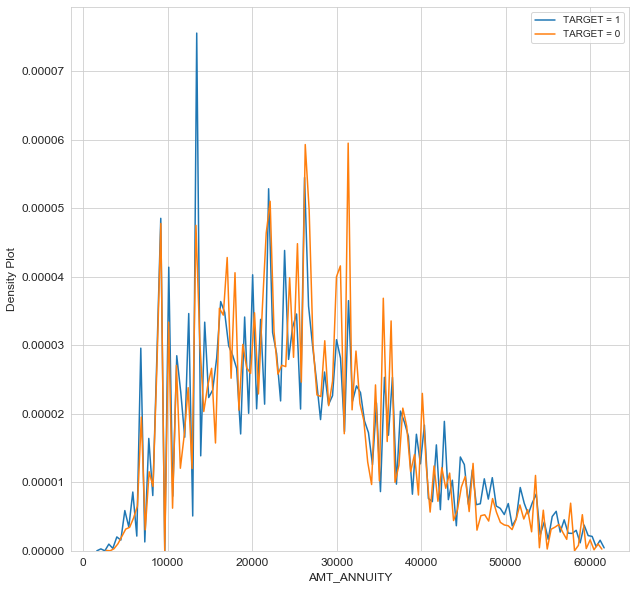

In [34]:
#removing the outliers
credit_amt=clean_df[clean_df['AMT_ANNUITY'] < caps[1]]

#checking the defaulters and payers
cont_plot(credit_amt,'AMT_ANNUITY')

In [35]:
#TBD analysis

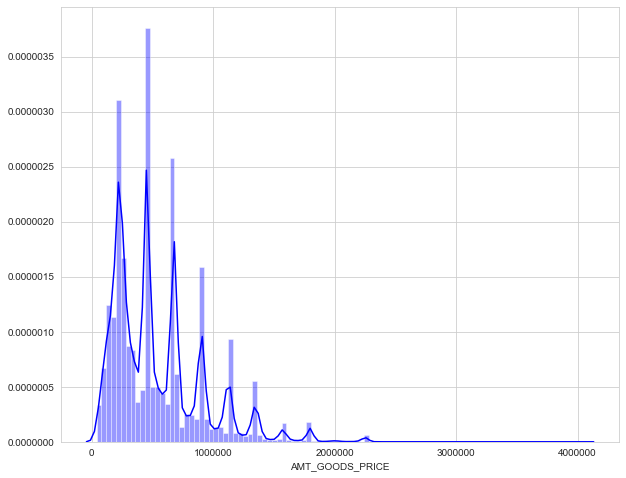

0.25    238500.0
0.50    450000.0
0.75    679500.0
Name: AMT_GOODS_PRICE, dtype: float64


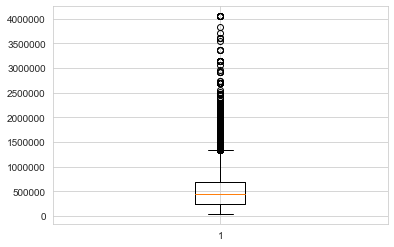

In [36]:
#AMT_GOODS_PRICE
plt.figure(figsize = (10,8))
sns.distplot(clean_df['AMT_GOODS_PRICE'].dropna(),color='blue', kde=True,bins=100)
plt.show()
print(clean_df['AMT_GOODS_PRICE'].quantile([0.25,0.5,0.75]))
boxplot = plt.boxplot(clean_df['AMT_GOODS_PRICE'].dropna())
caps=[item.get_ydata()[0] for item in boxplot['caps']]
plt.show()

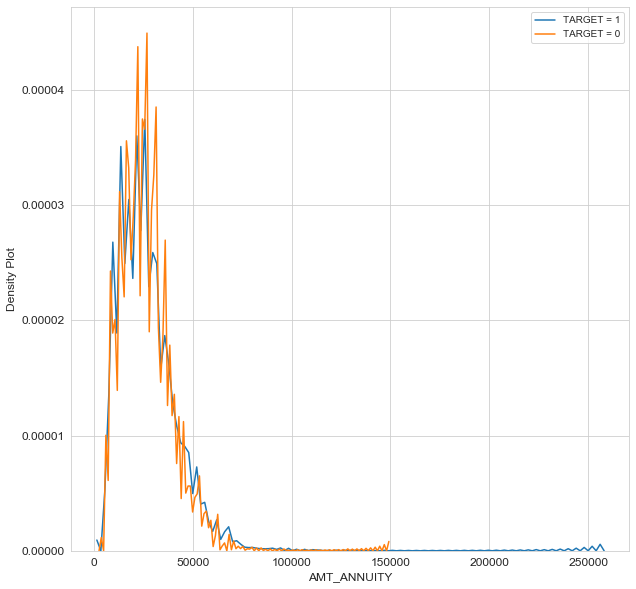

In [37]:
#removing the outliers
credit_amt=clean_df[clean_df['AMT_ANNUITY'] < caps[1]]

#checking the defaulters and payers
cont_plot(credit_amt,'AMT_ANNUITY')

In [38]:
#TBD analysis

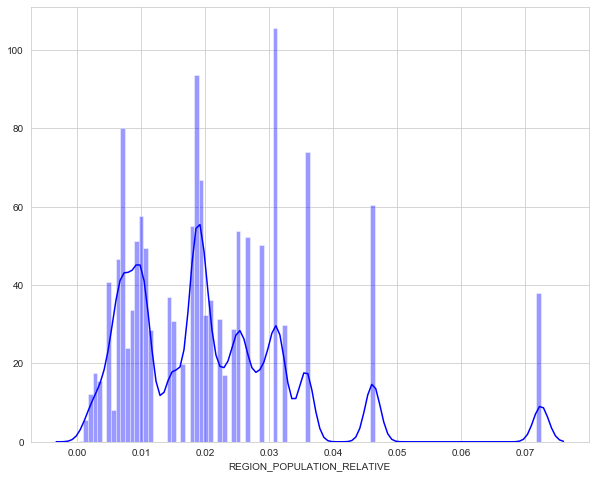

In [42]:
#REGION_POPULATION_RELATIVE
plt.figure(figsize = (10,8))
sns.distplot(clean_df['REGION_POPULATION_RELATIVE'].dropna(),color='blue', kde=True,bins=100)
plt.show()

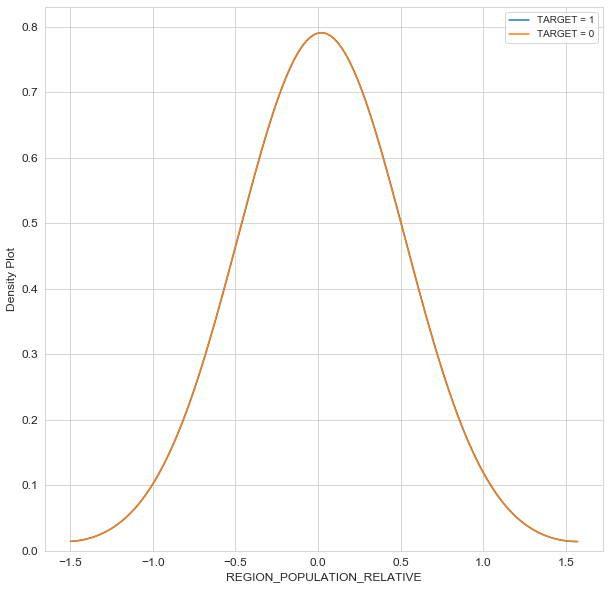

In [41]:
#checking the defaulters and payers
cont_plot(clean_df,'REGION_POPULATION_RELATIVE')

In [ ]:
#TBD analysis

In [64]:
#DAYS_BIRTH
#let's convert into years
clean_df['Age_Years']=np.int64(clean_df['DAYS_BIRTH']/-365.25)
clean_df['Emp_Years']=np.int64(clean_df['DAYS_EMPLOYED']/-365.25)
clean_df['Reg_Months']=np.int64(clean_df['DAYS_REGISTRATION']/-30)
clean_df['ID_Months']=np.int64(clean_df['DAYS_ID_PUBLISH']/-30)   

C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

69 20


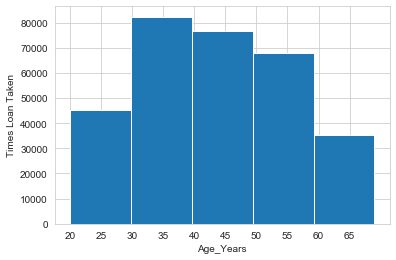

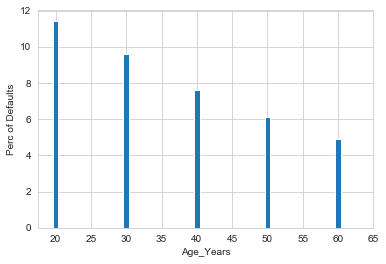

In [51]:
#AGE
#checking the min and max in Age_Years
print(clean_df['Age_Years'].max(),clean_df['Age_Years'].min())
#group the age into bins of 10 years
pp=plt.hist(clean_df['Age_Years'], bins=5)
plt.ylabel('Times Loan Taken')
plt.xlabel('Age_Years')
plt.xticks(np.arange(20, 70, 5))
plt.show()
#We can clearly see here that most of the people are taking more loans

#checking the defaulters for number of children
defaulter = clean_df[clean_df['TARGET']==1]
def_hist =  plt.hist(defaulter['Age_Years'], bins=5,range=(20,70))
kk=[]
for i in range(len(def_hist[0])):
    if(pp[0][i]!=0):
        kk.append((def_hist[0][i]/pp[0][i]) *100)
    else:
        kk.append(0.0)
plt.close()
plt.bar(tuple(def_hist[1][:-1]),tuple(kk))
plt.ylabel('Perc of Defaults')
plt.xlabel('Age_Years')
plt.xticks(np.arange(20, 70, 5))
plt.draw()

In [52]:
#ANALYSIS

49 0


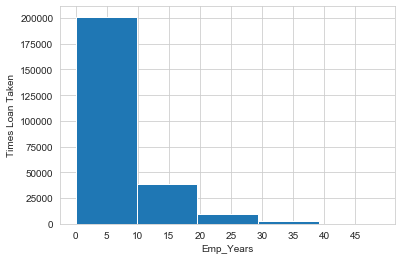

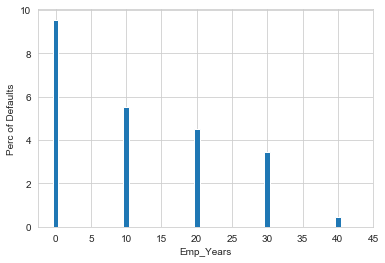

In [57]:
#years employed
#removing years -999
dd=clean_df[clean_df['Emp_Years']!= -999]
#checking the min and max in Age_Years
print(dd['Emp_Years'].max(),dd['Emp_Years'].min())
#group the age into bins of 10 years
pp=plt.hist(dd['Emp_Years'], bins=5)
plt.ylabel('Times Loan Taken')
plt.xlabel('Emp_Years')
plt.xticks(np.arange(0, 50, 5))
plt.show()
#We can clearly see here that most of the people are taking more loans

#checking the defaulters for number of children
defaulter = dd[dd['TARGET']==1]
def_hist =  plt.hist(defaulter['Emp_Years'], bins=5,range=(0,50))
kk=[]
for i in range(len(def_hist[0])):
    if(pp[0][i]!=0):
        kk.append((def_hist[0][i]/pp[0][i]) *100)
    else:
        kk.append(0.0)
plt.close()
plt.bar(tuple(def_hist[1][:-1]),tuple(kk))
plt.ylabel('Perc of Defaults')
plt.xlabel('Emp_Years')
plt.xticks(np.arange(0,50, 5))
plt.draw()

In [58]:
#ANALYSIS

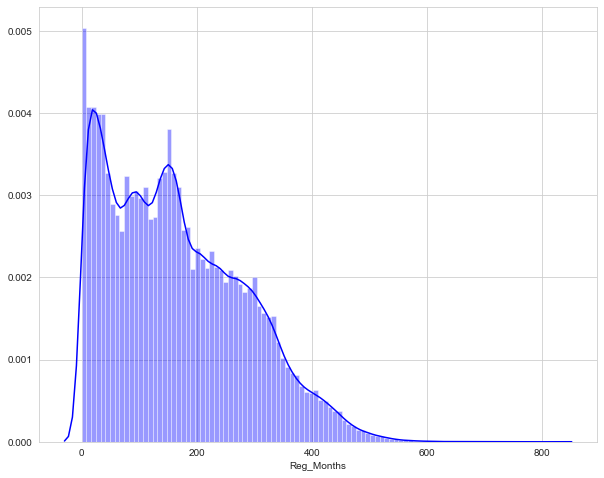

0.25     67.0
0.50    150.0
0.75    249.0
Name: Reg_Months, dtype: float64


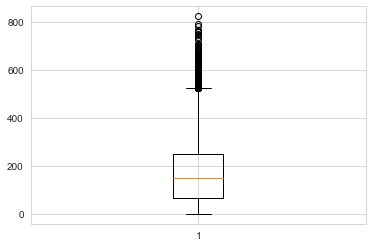

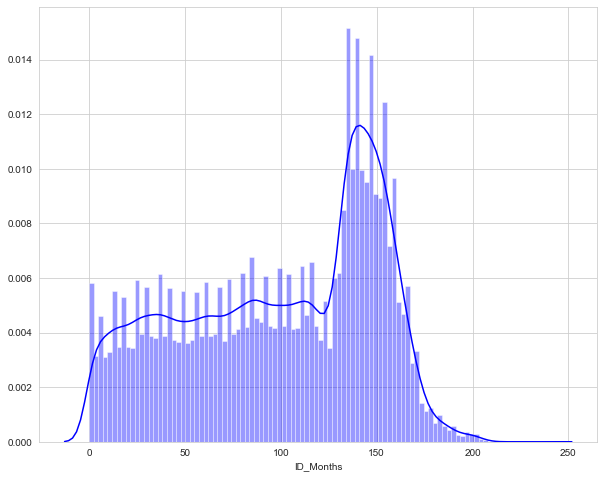

0.25     57.0
0.50    108.0
0.75    143.0
Name: ID_Months, dtype: float64


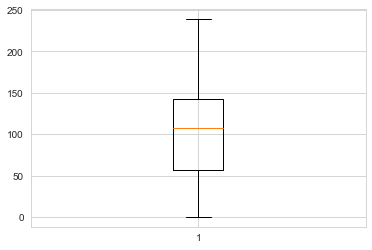

In [65]:
#Reg_Months
#Emp_Months
plt.figure(figsize = (10,8))
sns.distplot(clean_df['Reg_Months'].dropna(),color='blue', kde=True,bins=100)
plt.show()
print(clean_df['Reg_Months'].quantile([0.25,0.5,0.75]))
boxplot = plt.boxplot(clean_df['Reg_Months'].dropna())
caps=[item.get_ydata()[0] for item in boxplot['caps']]
plt.show()

plt.figure(figsize = (10,8))
sns.distplot(clean_df['ID_Months'].dropna(),color='blue', kde=True,bins=100)
plt.show()
print(clean_df['ID_Months'].quantile([0.25,0.5,0.75]))
boxplot = plt.boxplot(clean_df['ID_Months'].dropna())
caps1=[item.get_ydata()[0] for item in boxplot['caps']]
plt.show()

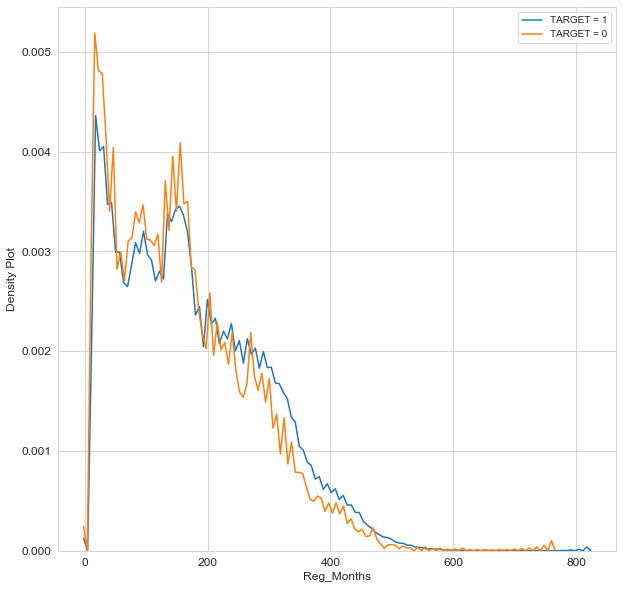

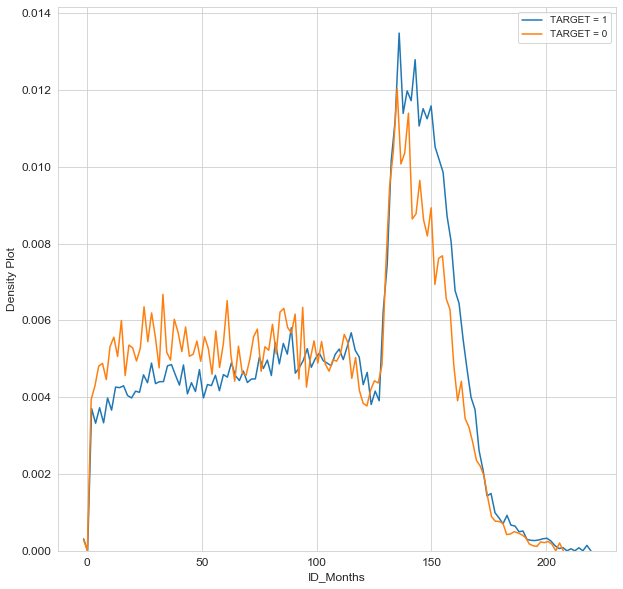

In [66]:
#removing the outliers
credit_amt=clean_df[clean_df['Reg_Months'] < caps[1]]
credit_amt=clean_df[clean_df['ID_Months'] < caps1[1]]

#checking the defaulters and payers
cont_plot(credit_amt,'Reg_Months')
cont_plot(credit_amt,'ID_Months')

20.0 1.0


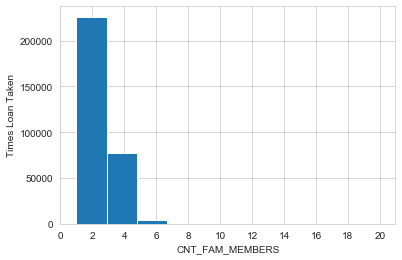

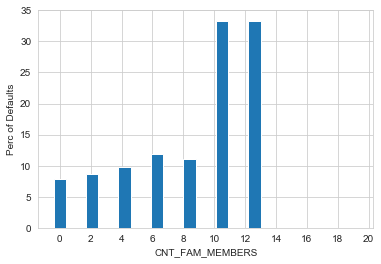

In [80]:
#CNT_FAM_MEMBERS
#checking the min and max in Age_Years
print(clean_df['CNT_FAM_MEMBERS'].max(),clean_df['CNT_FAM_MEMBERS'].min())
#group the age into bins of 10 years
pp=plt.hist(clean_df['CNT_FAM_MEMBERS'], bins=10)
plt.ylabel('Times Loan Taken')
plt.xlabel('CNT_FAM_MEMBERS')
plt.xticks(np.arange(0, 21, 2))
plt.show()
#We can clearly see here that most of the people are taking more loans

#checking the defaulters for number of children
defaulter = clean_df[clean_df['TARGET']==1]
def_hist =  plt.hist(defaulter['CNT_FAM_MEMBERS'], bins=10,range=(0,21))
kk=[]
for i in range(len(def_hist[0])):
    if(pp[0][i]!=0):
        kk.append((def_hist[0][i]/pp[0][i]) *100)
    else:
        kk.append(0.0)
plt.close()
plt.bar(tuple(def_hist[1][:-1]),tuple(kk))
plt.ylabel('Perc of Defaults')
plt.xlabel('CNT_FAM_MEMBERS')
plt.xticks(np.arange(0,21,2))
plt.draw()

In [70]:
#ANAYSIS

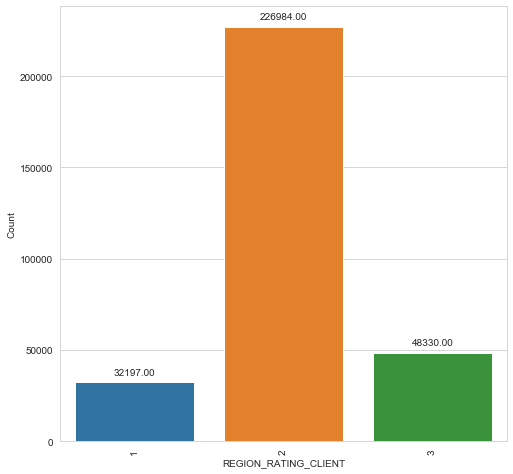

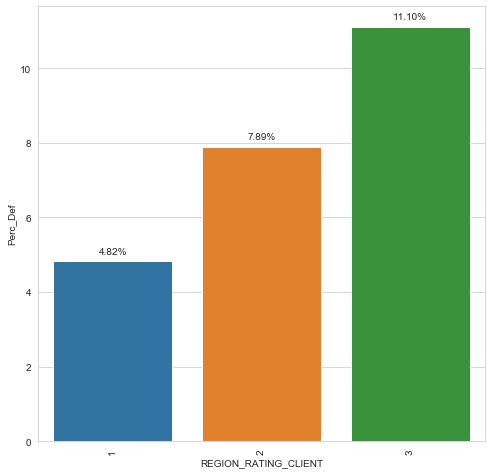

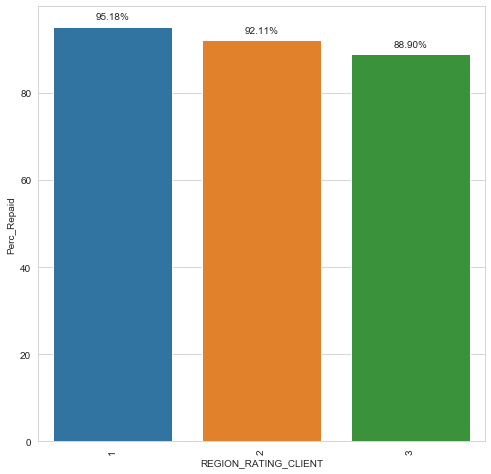

In [72]:
#REGION_RATING_CLIENT
cat_plot(clean_df,'REGION_RATING_CLIENT',True,(8,8))

In [73]:
#ANALYSIS

C:\Users\Archit.srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


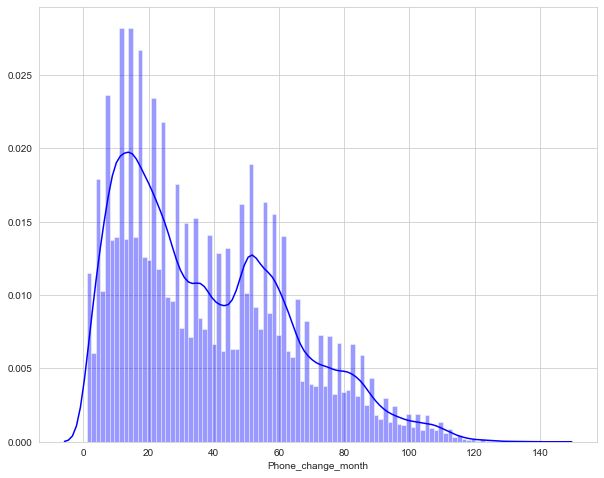

0.25    16.0
0.50    33.0
0.75    56.0
Name: Phone_change_month, dtype: float64


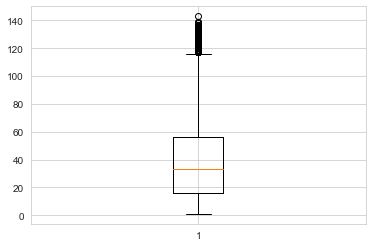

In [82]:
#DAYS_LAST_PHONE_CHANGE
clean_df['Phone_change_month']=np.int64(clean_df['DAYS_LAST_PHONE_CHANGE']/-30) 
dd=clean_df[clean_df['Phone_change_month']>0]
#Reg_Months
#Emp_Months
plt.figure(figsize = (10,8))
sns.distplot(dd['Phone_change_month'].dropna(),color='blue', kde=True,bins=100)
plt.show()
print(dd['Phone_change_month'].quantile([0.25,0.5,0.75]))
boxplot = plt.boxplot(dd['Phone_change_month'].dropna())
caps=[item.get_ydata()[0] for item in boxplot['caps']]
plt.show()


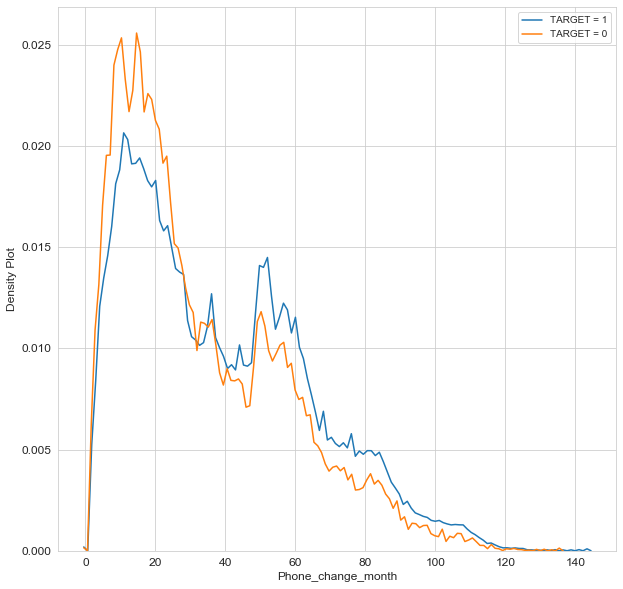

In [83]:
#removing outliers
credit_amt=dd[dd['Phone_change_month'] < caps1[1]]

#checking the defaulters and payers
cont_plot(credit_amt,'Phone_change_month')

262.0 0.0


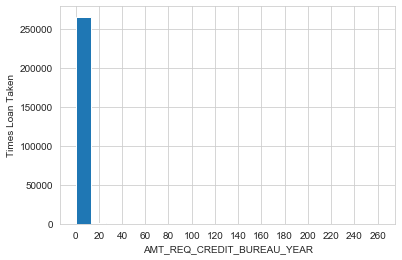

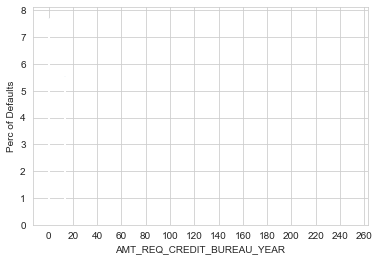

In [85]:
#AMT_REQ_CREDIT_BUREAU_YEAR
#checking the min and max in AMT_REQ_CREDIT_BUREAU_YEAR
print(clean_df['AMT_REQ_CREDIT_BUREAU_YEAR'].max(),clean_df['AMT_REQ_CREDIT_BUREAU_YEAR'].min())
#group the enquiries in bins of 20
pp=plt.hist(clean_df['AMT_REQ_CREDIT_BUREAU_YEAR'], bins=20)
plt.ylabel('Times Loan Taken')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.xticks(np.arange(0,263,20))
plt.show()
#We can clearly see here that most of the people are taking more loans

#checking the defaulters for number of children
defaulter = clean_df[clean_df['TARGET']==1]
def_hist =  plt.hist(defaulter['AMT_REQ_CREDIT_BUREAU_YEAR'], bins=20,range=(0,263))
kk=[]
for i in range(len(def_hist[0])):
    if(pp[0][i]!=0):
        kk.append((def_hist[0][i]/pp[0][i]) *100)
    else:
        kk.append(0.0)
plt.close()
plt.bar(tuple(def_hist[1][:-1]),tuple(kk))
plt.ylabel('Perc of Defaults')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.xticks(np.arange(0,263,20))
plt.draw()

692.0 0.0


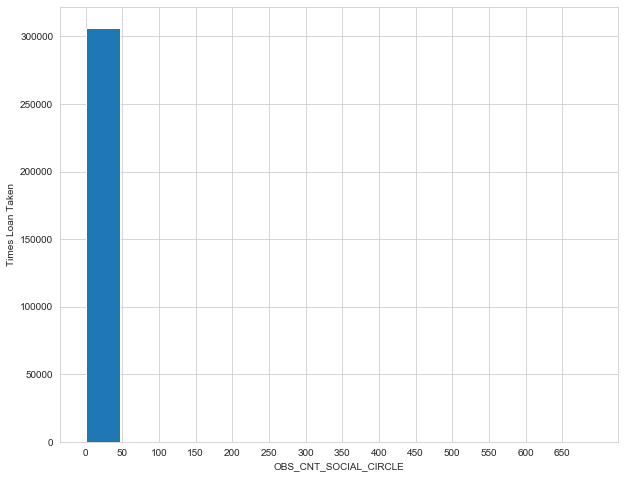

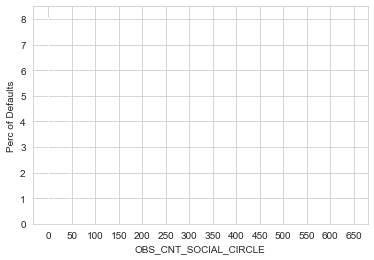

In [90]:
#OBS_CNT_SOCIAL_CIRCLE
#checking the min and max in OBS_CNT_SOCIAL_CIRCLE
print(clean_df['OBS_CNT_SOCIAL_CIRCLE'].max(),clean_df['OBS_CNT_SOCIAL_CIRCLE'].min())
#group the attribute in bins of 15
plt.figure(figsize = (10,8))
pp=plt.hist(clean_df['OBS_CNT_SOCIAL_CIRCLE'], bins=15)
plt.ylabel('Times Loan Taken')
plt.xlabel('OBS_CNT_SOCIAL_CIRCLE')
plt.xticks(np.arange(0,693,50))
plt.show()
#We can clearly see here that most of the people are taking more loans

#checking the defaulters for this attribute
defaulter = clean_df[clean_df['TARGET']==1]
def_hist =  plt.hist(defaulter['OBS_CNT_SOCIAL_CIRCLE'], bins=15,range=(0,693))
kk=[]
for i in range(len(def_hist[0])):
    if(pp[0][i]!=0):
        kk.append((def_hist[0][i]/pp[0][i]) *100)
    else:
        kk.append(0.0)
plt.close()
plt.bar(tuple(def_hist[1][:-1]),tuple(kk))
plt.ylabel('Perc of Defaults')
plt.xlabel('OBS_CNT_SOCIAL_CIRCLE')
plt.xticks(np.arange(0,693,50))
plt.draw()

58.0 0.0


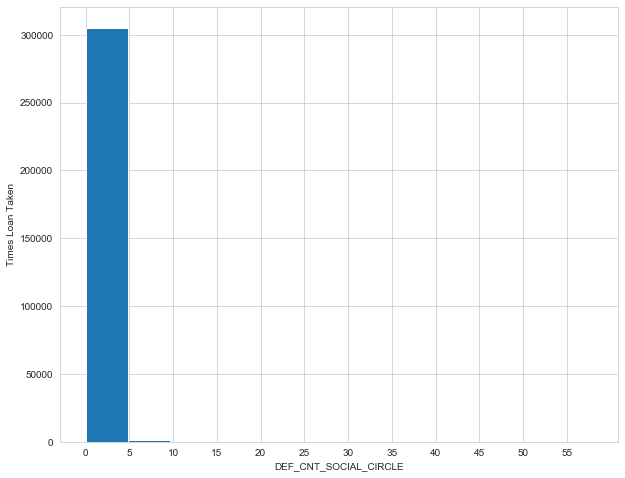

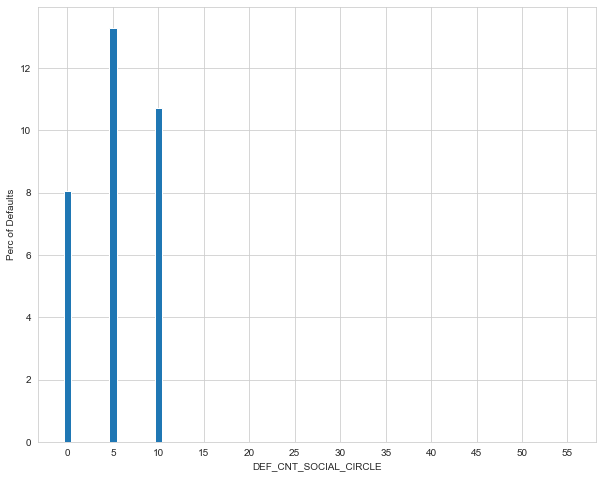

In [93]:
#DEF_CNT_SOCIAL_CIRCLE
#checking the min and max in DEF_CNT_SOCIAL_CIRCLE
print(clean_df['DEF_CNT_SOCIAL_CIRCLE'].max(),clean_df['DEF_CNT_SOCIAL_CIRCLE'].min())
#group the attribute in bins of 12
plt.figure(figsize = (10,8))
pp=plt.hist(clean_df['DEF_CNT_SOCIAL_CIRCLE'], bins=12)
plt.ylabel('Times Loan Taken')
plt.xlabel('DEF_CNT_SOCIAL_CIRCLE')
plt.xticks(np.arange(0,60,5))
plt.show()

#checking the defaulters for this attribute
defaulter = clean_df[clean_df['TARGET']==1]
def_hist =  plt.hist(defaulter['DEF_CNT_SOCIAL_CIRCLE'], bins=12,range=(0,60))
kk=[]
for i in range(len(def_hist[0])):
    if(pp[0][i]!=0):
        kk.append((def_hist[0][i]/pp[0][i]) *100)
    else:
        kk.append(0.0)
plt.close()
plt.figure(figsize = (10,8))
plt.bar(tuple(def_hist[1][:-1]),tuple(kk))
plt.ylabel('Perc of Defaults')
plt.xlabel('DEF_CNT_SOCIAL_CIRCLE')
plt.xticks(np.arange(0,60,5))
plt.draw()

23 0


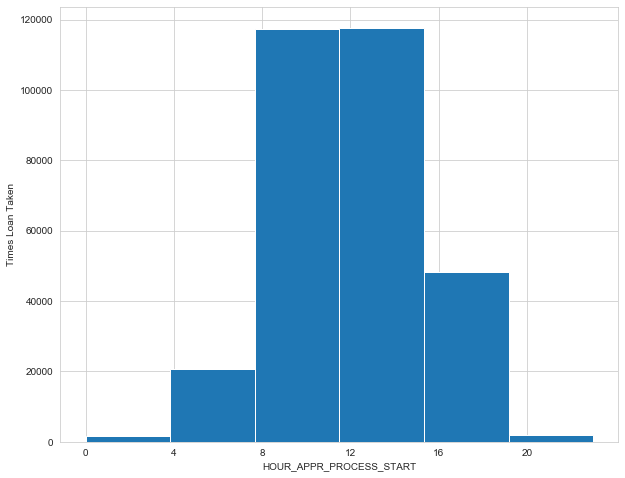

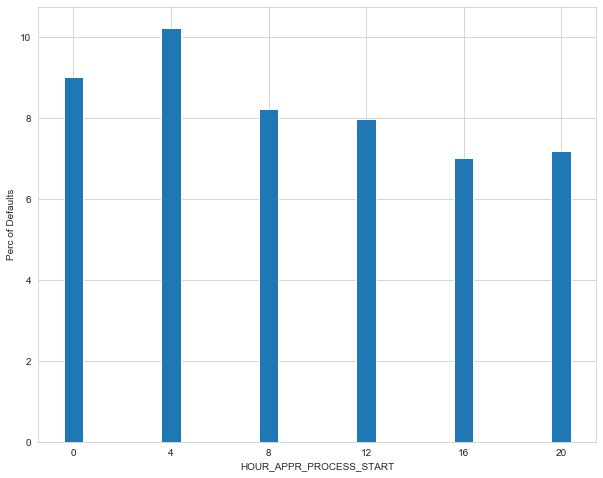

In [95]:
#HOUR_APPR_PROCESS_START
#checking the min and max in HOUR_APPR_PROCESS_START
print(clean_df['HOUR_APPR_PROCESS_START'].max(),clean_df['HOUR_APPR_PROCESS_START'].min())
#group the attribute in bins of 6
plt.figure(figsize = (10,8))
pp=plt.hist(clean_df['HOUR_APPR_PROCESS_START'], bins=6)
plt.ylabel('Times Loan Taken')
plt.xlabel('HOUR_APPR_PROCESS_START')
plt.xticks(np.arange(0,24,4))
plt.show()

#checking the defaulters for this attribute
defaulter = clean_df[clean_df['TARGET']==1]
def_hist =  plt.hist(defaulter['HOUR_APPR_PROCESS_START'], bins=6,range=(0,24))
kk=[]
for i in range(len(def_hist[0])):
    if(pp[0][i]!=0):
        kk.append((def_hist[0][i]/pp[0][i]) *100)
    else:
        kk.append(0.0)
plt.close()
plt.figure(figsize = (10,8))
plt.bar(tuple(def_hist[1][:-1]),tuple(kk))
plt.ylabel('Perc of Defaults')
plt.xlabel('HOUR_APPR_PROCESS_START')
plt.xticks(np.arange(0,24,4))
plt.draw()

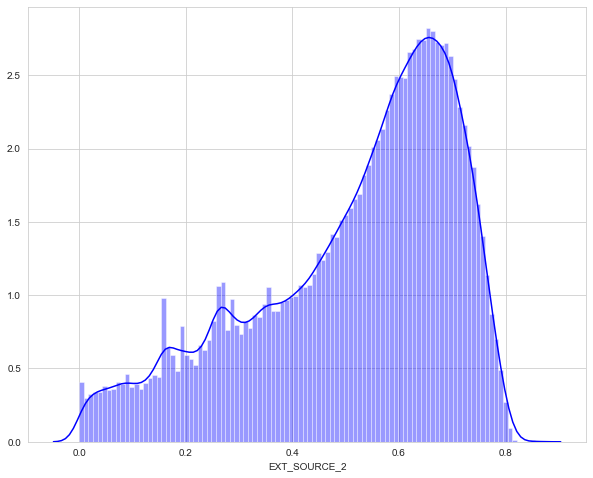

0.25    0.392457
0.50    0.565961
0.75    0.663617
Name: EXT_SOURCE_2, dtype: float64


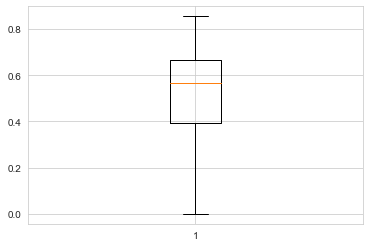

In [97]:
#EXT_SOURCE_2
dd=clean_df[clean_df['EXT_SOURCE_2']>0]
plt.figure(figsize = (10,8))
sns.distplot(dd['EXT_SOURCE_2'].dropna(),color='blue', kde=True,bins=100)
plt.show()
print(dd['EXT_SOURCE_2'].quantile([0.25,0.5,0.75]))
boxplot = plt.boxplot(dd['EXT_SOURCE_2'].dropna())
caps=[item.get_ydata()[0] for item in boxplot['caps']]
plt.show()

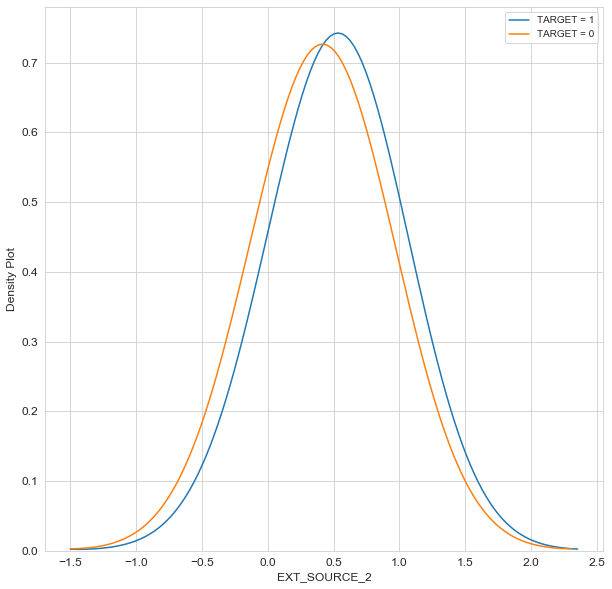

In [98]:
#removing outliers
credit_amt=dd[dd['EXT_SOURCE_2'] < caps1[1]]

#checking the defaulters and payers
cont_plot(credit_amt,'EXT_SOURCE_2')

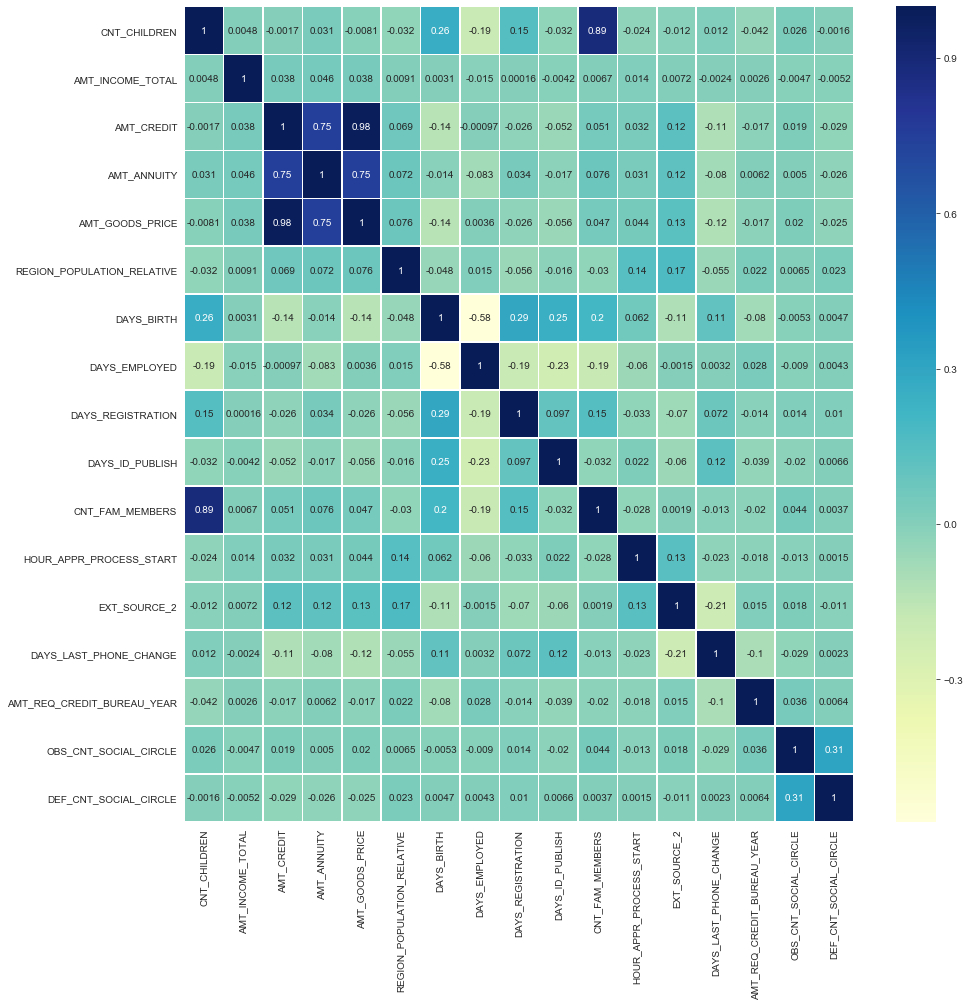

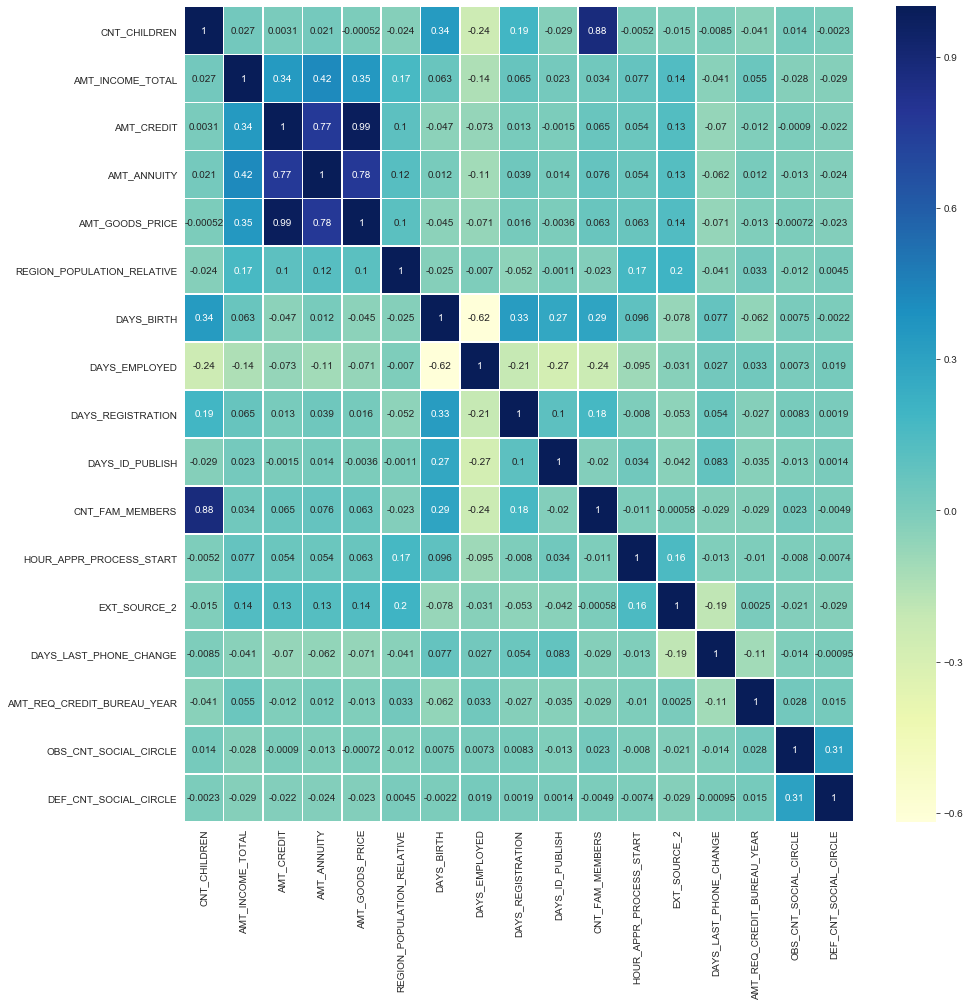

In [112]:
#Checking correlation of certain metrics
defaulter_data=clean_df[clean_df['TARGET']==1]
repayer_data=clean_df[clean_df['TARGET']==0]

list_to_check=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE',
'AMT_REQ_CREDIT_BUREAU_YEAR','OBS_CNT_SOCIAL_CIRCLE','DEF_CNT_SOCIAL_CIRCLE']

def_corr=defaulter_data[list_to_check].corr()
rep_corr=repayer_data[list_to_check].corr()

plt.figure(figsize = (15,15))
ax = sns.heatmap(def_corr,annot=True,linewidth=0.5,cmap="YlGnBu")
plt.show()
plt.figure(figsize = (15,15))
bx = sns.heatmap(rep_corr,annot=True,linewidth=0.5,cmap="YlGnBu")
plt.show()